# Problem Statement:
Predict Loan Eligibility for Dream Housing Finance company Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

# Data Dictionary
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

Variable Description Loan_ID Unique Loan ID Gender Male/ Female Married Applicant married (Y/N) Dependents Number of dependents Education Applicant Education (Graduate/ Under Graduate) Self_Employed Self employed (Y/N) ApplicantIncome Applicant income CoapplicantIncome Coapplicant income LoanAmount Loan amount in thousands Loan_Amount_Term Term of loan in months Credit_History credit history meets guidelines Property_Area Urban/ Semi Urban/ Rural Loan_Status (Target) Loan approved (Y/N)

Test file: CSV containing the customer information for whom loan eligibility is to be predicted

Variable Description Loan_ID Unique Loan ID Gender Male/ Female Married Applicant married (Y/N) Dependents Number of dependents Education Applicant Education (Graduate/ Under Graduate) Self_Employed Self employed (Y/N) ApplicantIncome Applicant income CoapplicantIncome Coapplicant income LoanAmount Loan amount in thousands Loan_Amount_Term Term of loan in months Credit_History credit history meets guidelines Property_Area Urban/ Semi Urban/ Rural

Submission file format

Variable Description Loan_ID Unique Loan ID Loan_Status (Target) Loan approved (Y/N)

Evaluation Metric
Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the Accuracy value to judge your response.

### Assumptions: 
CIBIL Score - Yes 
Employement type - Yes 
Loan Amount - Yes 
Income - Yes 
Excisting Loan - NO 
Location of Property - Yes 
Age - NO 
Tenure - Yes

In [2]:
# import the libraries used
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, recall_score, precision_score

In [21]:
#submitting submission file without any activity 
#0.2847222222

In [3]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")
submission = pd.read_csv("sample_submission_49d68Cx.csv")


In [4]:
train_orig = train.copy()
test_orig = test.copy()
submission_orig = submission.copy()

In [5]:
train.shape, test.shape, submission.shape

((614, 13), (367, 12), (367, 2))

In [6]:
train.index, test.index, submission.index

(RangeIndex(start=0, stop=614, step=1),
 RangeIndex(start=0, stop=367, step=1),
 RangeIndex(start=0, stop=367, step=1))

In [7]:
train.columns.difference(test.columns), test.columns.intersection(submission.columns)

(Index(['Loan_Status'], dtype='object'), Index(['Loan_ID'], dtype='object'))

In [8]:
submission['Loan_Status'].unique()

array(['N'], dtype=object)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [34]:
train.Loan_Status.isna().sum()

0

In [9]:
train[train.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [10]:
test[test.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [11]:
data = pd.concat([train,test])
data_orig = data.copy()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [40]:
data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0


In [42]:
pd.options.display.max_columns

20

In [44]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            357, 358, 359, 360, 361, 362, 363, 364, 365, 366],
           dtype='int64', length=981)

In [490]:
data = data.reset_index().drop(columns="index")
data.index

RangeIndex(start=0, stop=981, step=1)

In [47]:
data.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [57]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [50]:
#[display(data[i].value_counts()) for i in data.columns if data[i].nunique() <20]

# EDA
## Univariate Analysis

<AxesSubplot:ylabel='Frequency'>

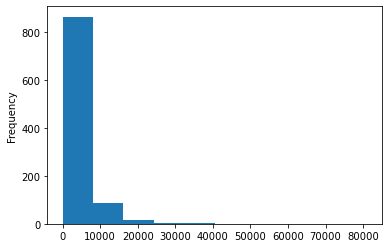

In [52]:
data["ApplicantIncome"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

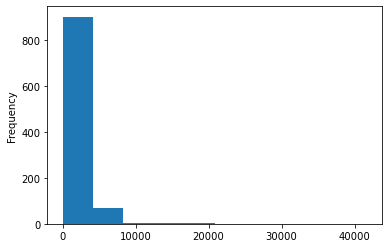

In [54]:
data["CoapplicantIncome"].plot(kind = 'hist')

<AxesSubplot:>

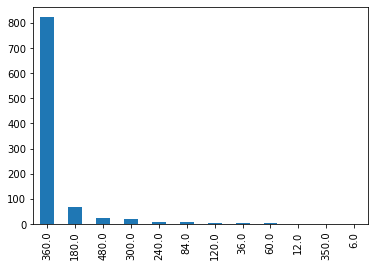

In [62]:
data["Loan_Amount_Term"].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

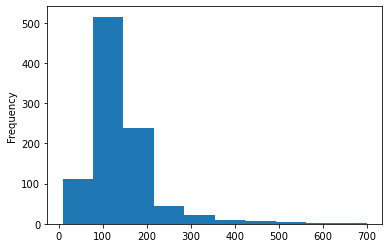

In [63]:
data["LoanAmount"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

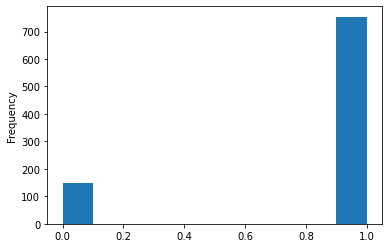

In [58]:
data["Credit_History"].plot(kind = 'hist')

<AxesSubplot:>

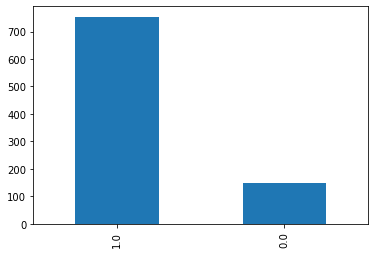

In [59]:
data["Credit_History"].value_counts().plot(kind = "bar")

In [107]:
#data.iloc[data["Loan_Amount_Term"].value_counts()<10]
#[data["Loan_Amount_Term"].value_counts().index for i in data["Loan_Amount_Term"].value_counts() if i<10]
data["Loan_Amount_Term"].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [111]:
data.isna().sum()[data.isna().sum().values>0]

Gender               24
Married               3
Dependents           25
Self_Employed        55
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Loan_Status         367
dtype: int64

In [112]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

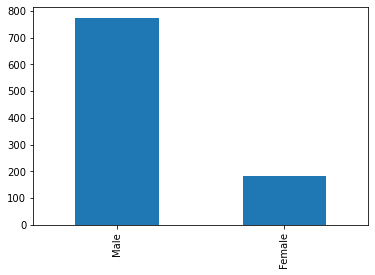

In [113]:
data['Gender'].value_counts().plot(kind = "bar")

<AxesSubplot:>

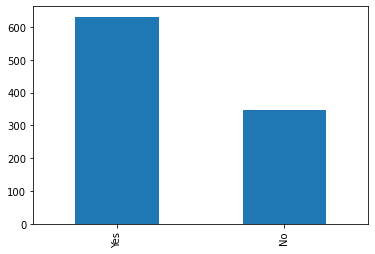

In [120]:
data['Married'].value_counts().plot(kind = "bar")

<AxesSubplot:>

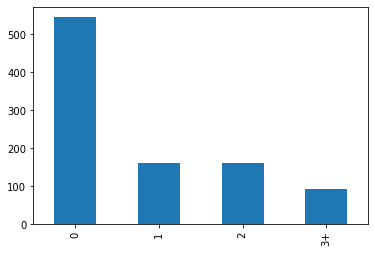

In [114]:
data['Dependents'].value_counts().plot(kind = "bar")

<AxesSubplot:>

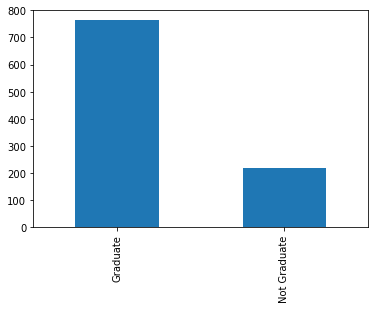

In [115]:
data['Education'].value_counts().plot(kind = "bar")

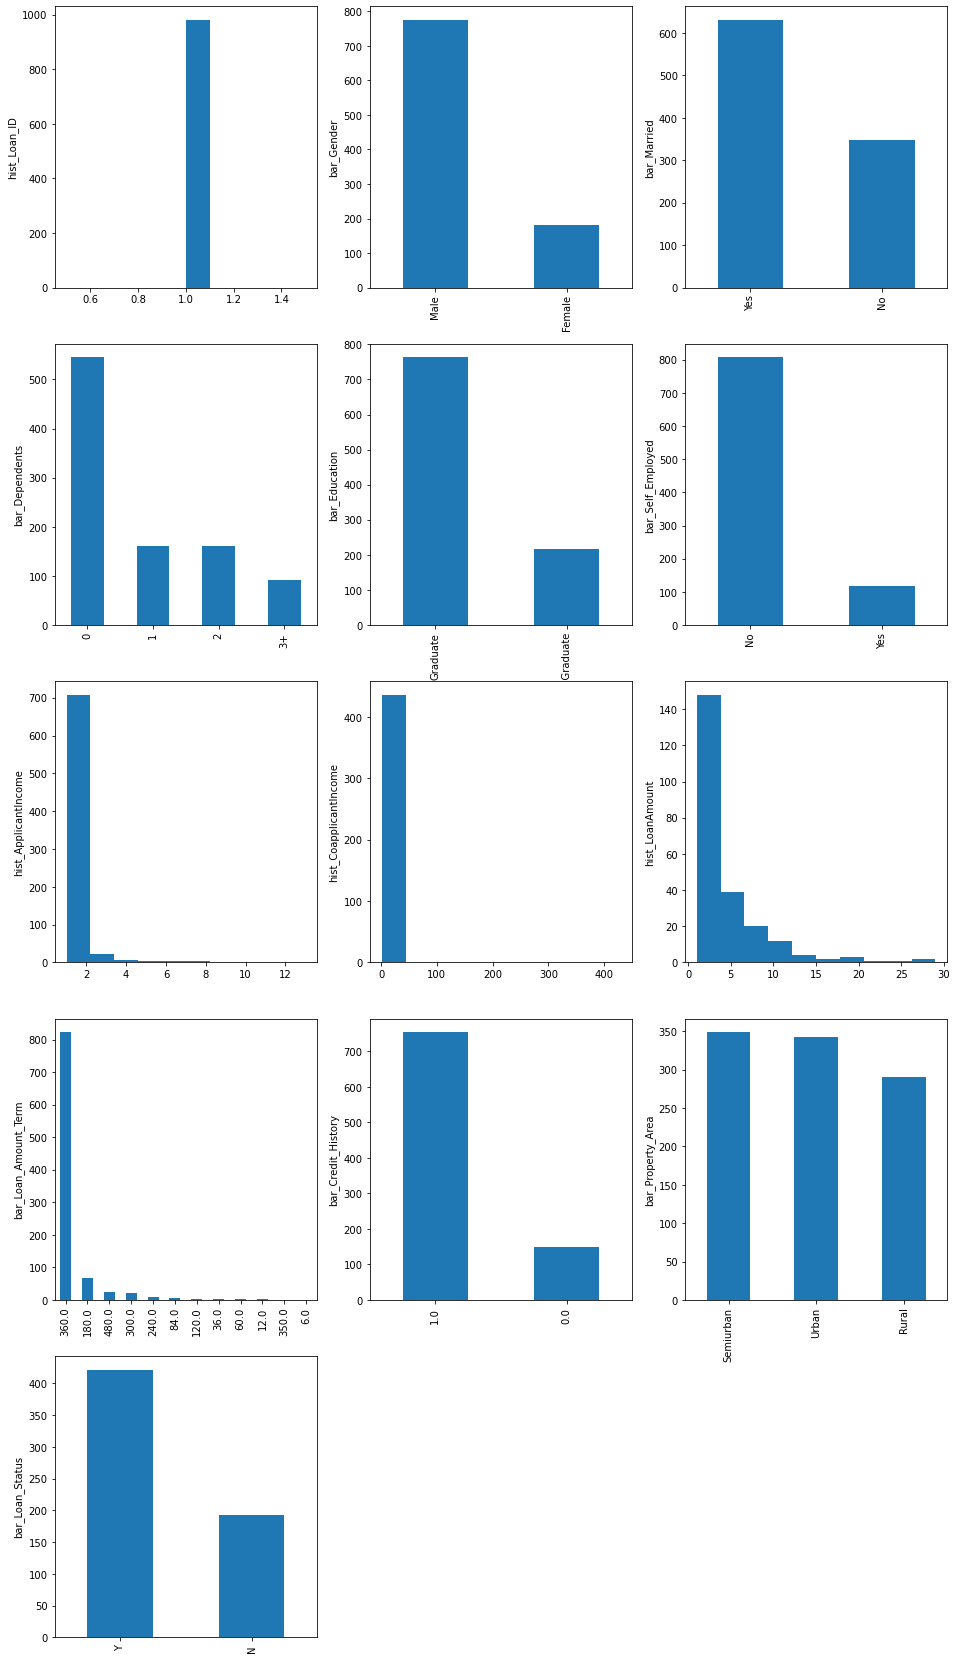

In [224]:
%matplotlib inline
plt.figure(figsize=(16,30))
k=1
col_cnt = 3
row_cnt = int(np.ceil(len(data.columns)/3))
for col in data.columns:
    plt.subplot(row_cnt,col_cnt,k)
    if data[col].nunique()<25: 
        title='bar'
        data[col].value_counts().plot(kind ='bar')
    else: 
        title='hist'
        data[col].value_counts().plot(kind ='hist')
    #plt.title(title+'_'+col)
    plt.ylabel(title+'_'+col)    
    k+=1
plt.show()

In [121]:
data.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# BiVariate analysis

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


<AxesSubplot:xlabel='Married'>

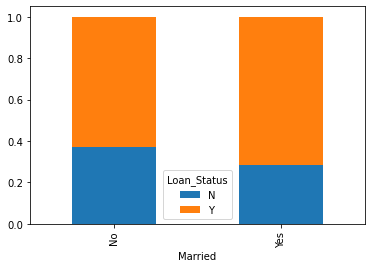

In [281]:
print(type(data["Married"]),type(data["Loan_Status"]))
pd.crosstab(data["Married"],data["Loan_Status"]).div(pd.crosstab(data["Married"],data["Loan_Status"]).sum(1),axis = 0).plot(kind = "bar", stacked = "True")

x: Married type(x): <class 'str'> y: Loan_Status type(y): <class 'str'>


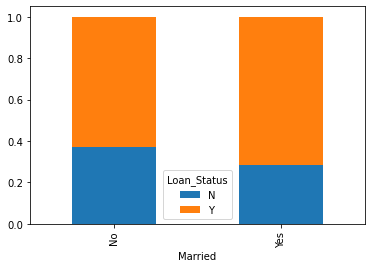

In [327]:
def plotbivariate_percentage(x, y):
    print("x:",x,"type(x):",type(x),"y:",y,"type(y):",type(y))
    cross = pd.crosstab(data[x],data[y])
    cross.div(cross.sum(1),axis = 0).plot(kind = "bar", stacked = "True")
plotbivariate_percentage("Married", "Loan_Status")

In [302]:
married = pd.crosstab(data["Married"],data['Loan_Status'])
print("type-data[married]:",type(data["Married"]),  "type-data[Loan_Status]:",type(data["Loan_Status"]) )
display(married)
display(married.sum(1))
display(married.div(cross.sum(1),axis = 0))

type-data[married]: <class 'pandas.core.series.Series'> type-data[Loan_Status]: <class 'pandas.core.series.Series'>


Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


Married
No     213
Yes    398
dtype: int64

Loan_Status,N,Y
Married,,
No,0.227666,0.386167
Yes,0.179081,0.451664


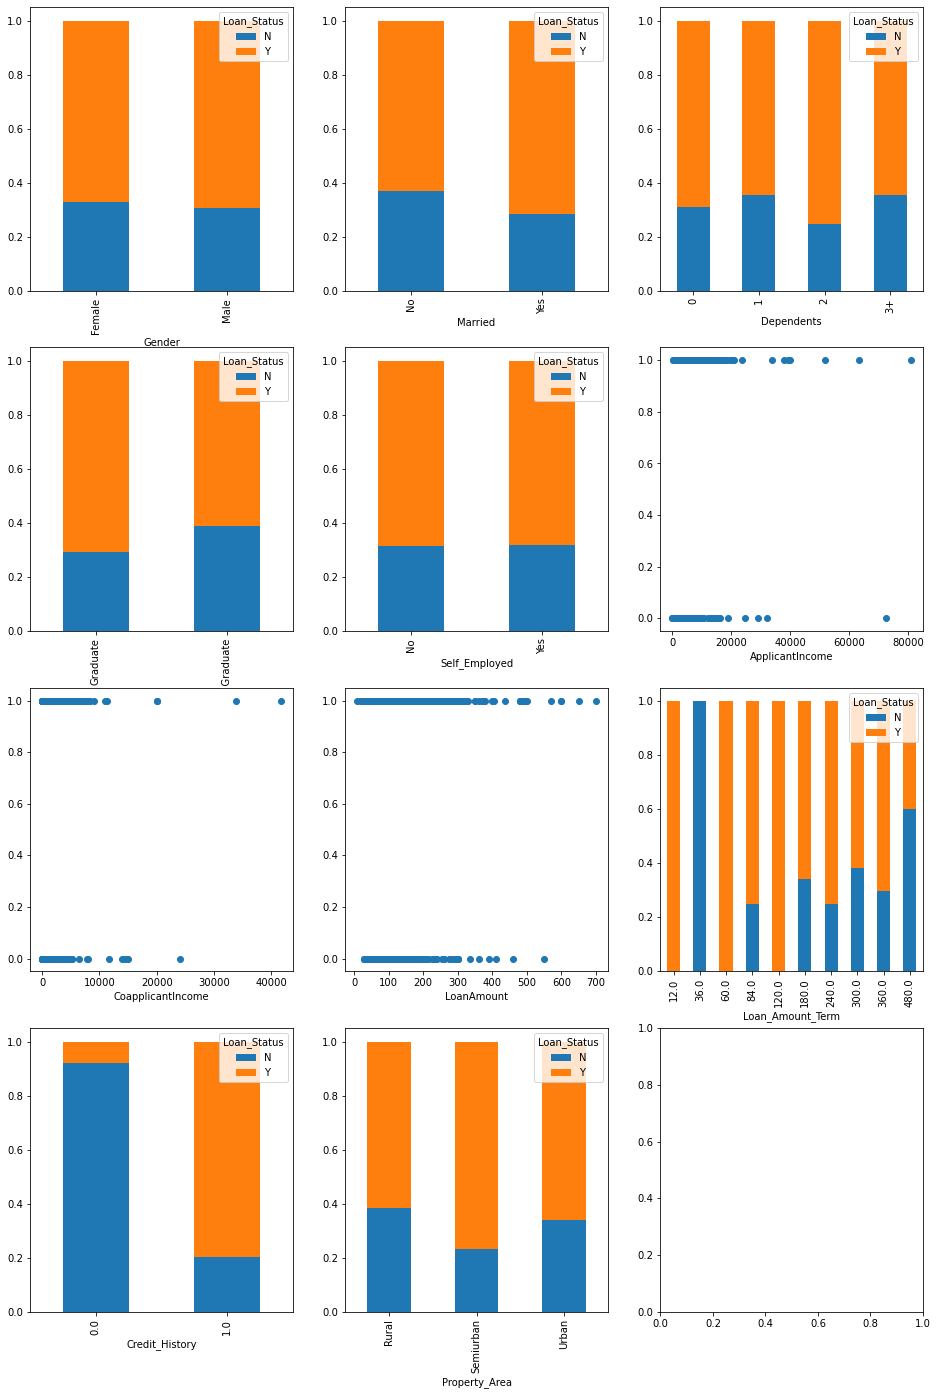

In [476]:
%matplotlib inline
j=k=0
col_cnt = 3
j=[idx for idx, col in enumerate(data.drop(columns=['Loan_ID','Loan_Status']).columns) if(data[col].nunique()<25) ]
j=len(j)
row_cnt = int(np.ceil(j/3))
row_cnt+=1

fig, ax = plt.subplots(ncols=col_cnt, nrows=row_cnt, figsize=(16, row_cnt*6))
ax = ax.flatten()
tgt_var = train.columns.difference(test.columns).values[0]

for idx, col in enumerate(data.drop(columns=['Loan_ID','Loan_Status']).columns) : 
    if data[col].nunique()<25 : 
        cross = pd.crosstab(data[col],data[tgt_var])      
        cross.div(cross.sum(1), axis=0).plot(kind='bar', stacked=True, ax=ax[k])
        #plt.title(col)  
    else :
        plt.subplot(row_cnt,col_cnt,k+1)
        plt.scatter(x=data[col], y=data[tgt_var].notnull())
        plt.xlabel(col) 
    k+=1        
plt.show()

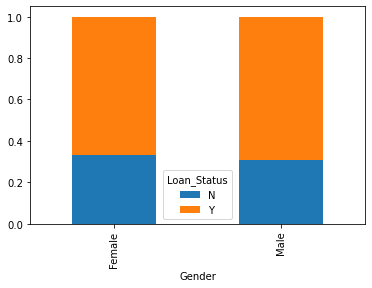

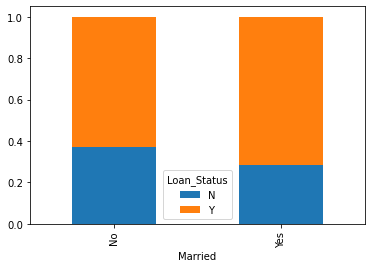

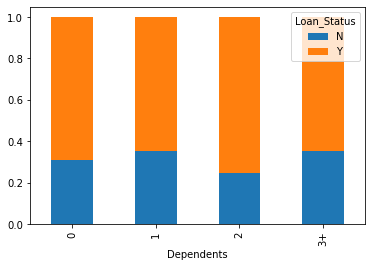

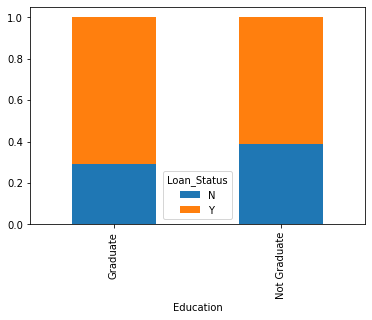

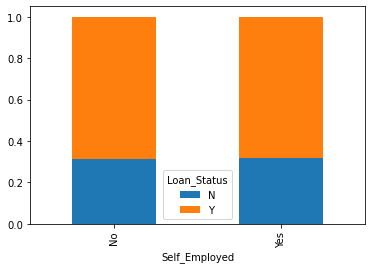

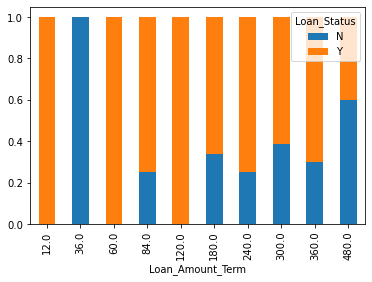

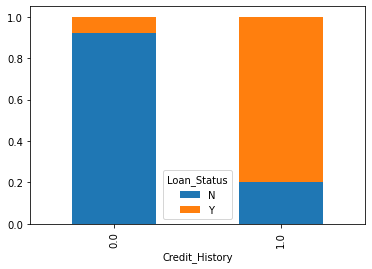

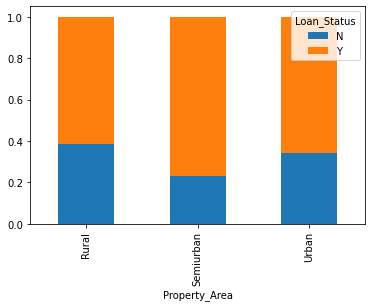

In [344]:
tgt_var = train.columns.difference(test.columns).values[0]
for col in data.drop(columns=['Loan_ID','Loan_Status']).columns : 
    if data[col].nunique()<25: 
        cross = pd.crosstab(data[col],data[tgt_var])
        cross.div(cross.sum(1), axis=0).plot(kind='bar', stacked=True, legend=True)

In [310]:
data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [313]:
data.shape, data.Loan_Status.value_counts(), data.Married.value_counts()

((981, 13),
 Y    422
 N    192
 Name: Loan_Status, dtype: int64,
 Yes    631
 No     347
 Name: Married, dtype: int64)

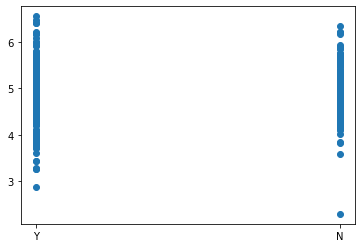

In [425]:
plt.scatter( train["Loan_Status"], np.log1p(train['LoanAmount']))


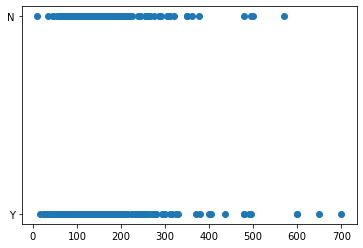

In [426]:

plt.scatter(  train['LoanAmount'], train["Loan_Status"])

int64 object


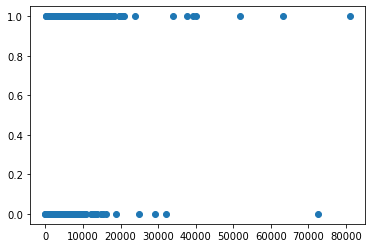

In [443]:
print(data['ApplicantIncome'].dtype, data["Loan_Status"].dtype)
plt.scatter(  data['ApplicantIncome'], data["Loan_Status"].notnull())

<AxesSubplot:>

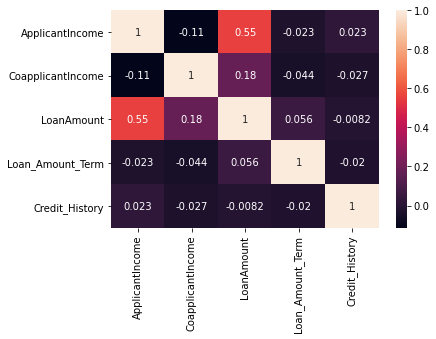

In [479]:
sns.heatmap(data.corr(),annot=True)

In [492]:
data["Loan_Status_num"] = data["Loan_Status"].replace({"Y":1, "N":0})
data["Gender_num"] = data["Gender"].replace({"Male":1, "Female":0})
data["Married_num"] = data["Married"].replace({"Yes":1, "No":0})
data["Education_num"] = data["Education"].replace({"Graduate":1, "Not Graduate":0})
data["Self_Employed_num"] = data["Self_Employed"].replace({"Yes":1, "No":0})
data["Property_Area_num"] = data["Property_Area"].replace({"Urban":2, "Semiurban":1, "Rural":0})

data["ApplicantIncome_log"] = np.log1p(data["ApplicantIncome"])
data["CoapplicantIncome_log"] = np.log1p(data["CoapplicantIncome"])
data["LoanAmount_log"] = np.log1p(data["LoanAmount"])



In [506]:
data.corr()[['Loan_Status_num']].T

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_num,Gender_num,Married_num,Education_num,Self_Employed_num,Property_Area_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
Loan_Status_num,-0.00471,-0.059187,-0.037318,-0.021268,0.561678,1.0,0.019857,0.08928,0.085884,-0.002303,0.032112,0.010959,0.060593,-0.039386


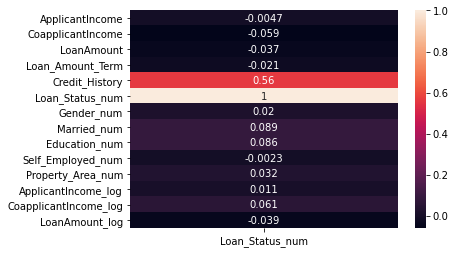

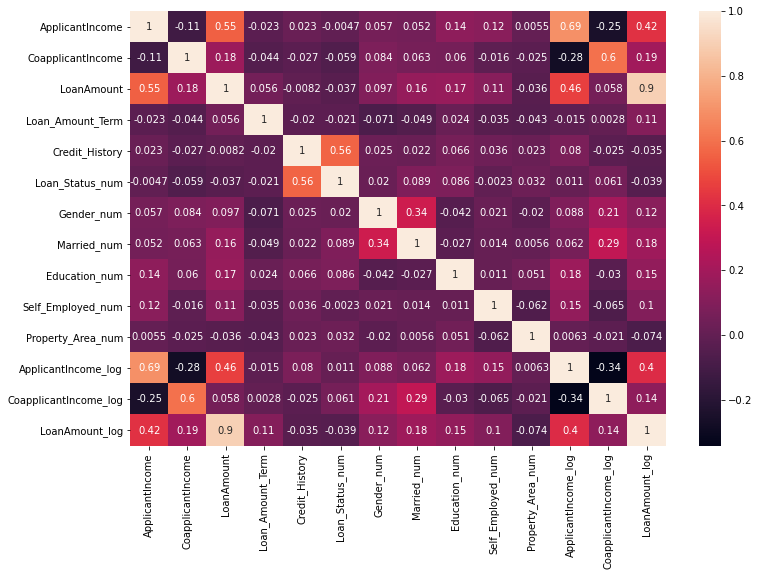

In [511]:
sns.heatmap(data.corr()[['Loan_Status_num']],annot=True)

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Data Preprocessing

In [555]:
print("for all features")
[print(data[i].isna().sum(),"(",round((data[i].isnull().sum()/len(data[i]))*100,2),"%)-->",i) for i in data.columns if data[i].isna().sum()>0]
#or
print("\nfor specific features")
z = ["Loan_Status_num","Gender_num","Married_num","Self_Employed_num","LoanAmount_log",
           'Education_num', 'Property_Area_num', 'ApplicantIncome_log','CoapplicantIncome_log']
[print(data[i].isna().sum(),"(",round((data[i].isnull().sum()/len(data[i]))*100,2),"%)-->",i) for i in data.drop(columns=z).columns if data[i].isna().sum()>0]


for all features
24 ( 2.45 %)--> Gender
3 ( 0.31 %)--> Married
25 ( 2.55 %)--> Dependents
55 ( 5.61 %)--> Self_Employed
27 ( 2.75 %)--> LoanAmount
20 ( 2.04 %)--> Loan_Amount_Term
79 ( 8.05 %)--> Credit_History
367 ( 37.41 %)--> Loan_Status
367 ( 37.41 %)--> Loan_Status_num
24 ( 2.45 %)--> Gender_num
3 ( 0.31 %)--> Married_num
55 ( 5.61 %)--> Self_Employed_num
27 ( 2.75 %)--> LoanAmount_log

for specific features
24 ( 2.45 %)--> Gender
3 ( 0.31 %)--> Married
25 ( 2.55 %)--> Dependents
55 ( 5.61 %)--> Self_Employed
27 ( 2.75 %)--> LoanAmount
20 ( 2.04 %)--> Loan_Amount_Term
79 ( 8.05 %)--> Credit_History
367 ( 37.41 %)--> Loan_Status


[None, None, None, None, None, None, None, None]

In [559]:
[print(train[i].isna().sum(),"(",round((train[i].isnull().sum()/len(train[i]))*100,2),"%)-->",i) for i in train.columns if train[i].isna().sum()>0]
print()
[print(test[i].isna().sum(),"(",round((test[i].isnull().sum()/len(test[i]))*100,2),"%)-->",i) for i in test.columns if test[i].isna().sum()>0]

13 ( 2.12 %)--> Gender
3 ( 0.49 %)--> Married
15 ( 2.44 %)--> Dependents
32 ( 5.21 %)--> Self_Employed
22 ( 3.58 %)--> LoanAmount
14 ( 2.28 %)--> Loan_Amount_Term
50 ( 8.14 %)--> Credit_History

11 ( 3.0 %)--> Gender
10 ( 2.72 %)--> Dependents
23 ( 6.27 %)--> Self_Employed
5 ( 1.36 %)--> LoanAmount
6 ( 1.63 %)--> Loan_Amount_Term
29 ( 7.9 %)--> Credit_History


[None, None, None, None, None, None]

In [561]:
data["Gender"].fillna("unknown",inplace=True)

In [562]:
data["Gender"].isna().sum()

0

In [567]:
data[data["Married"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,Loan_Status_num,Gender_num,Married_num,Education_num,Self_Employed_num,Property_Area_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,...,Y,1.0,1.0,NaN,1,0.0,2,8.247220,6.626718,5.081404
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,...,Y,1.0,1.0,NaN,1,0.0,1,8.467793,0.000000,5.068904
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,...,Y,1.0,0.0,NaN,1,0.0,1,9.215129,0.000000,NaN


In [575]:
pd.options.display.max_columns =None

In [579]:
pd.options.display.max_columns
data[data["Married"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_num,Gender_num,Married_num,Education_num,Self_Employed_num,Property_Area_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,1.0,1.0,NaN,1,0.0,2,8.247220,6.626718,5.081404
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,1.0,1.0,NaN,1,0.0,1,8.467793,0.000000,5.068904
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y,1.0,0.0,NaN,1,0.0,1,9.215129,0.000000,NaN


<AxesSubplot:xlabel='Married'>

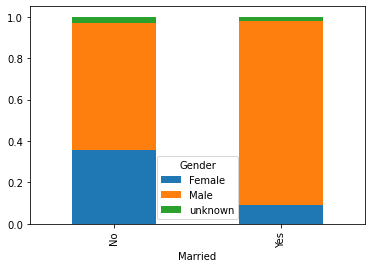

In [572]:
pd.crosstab(data["Married"],data["Gender"]).div(pd.crosstab(data["Married"],data["Gender"]).sum(1),axis = 0).plot(kind = "bar", stacked = "True")

<AxesSubplot:xlabel='Gender'>

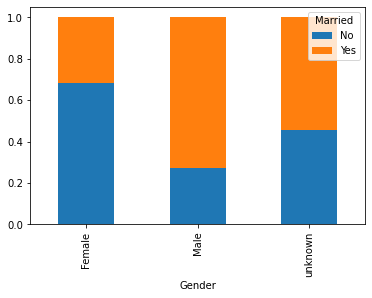

In [573]:
pd.crosstab(data["Gender"],data["Married"]).div(pd.crosstab(data["Gender"],data["Married"]).sum(1),axis = 0).plot(kind = "bar", stacked = "True")

In [580]:
data.dropna(subset=["Married"],inplace=True)

In [581]:
data.reset_index().drop(columns="index")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_num,Gender_num,Married_num,Education_num,Self_Employed_num,Property_Area_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1.0,1.0,0.0,1,0.0,2,8.674197,0.000000,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0,1.0,1.0,1,0.0,0,8.430327,7.319202,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,1.0,1.0,1,1.0,2,8.006701,0.000000,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0,1.0,1.0,0,0.0,2,7.857094,7.765993,4.795791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0,1.0,0.0,1,0.0,2,8.699681,0.000000,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,NaN,1.0,1.0,0,1.0,2,8.296547,7.483244,4.736198
974,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,NaN,1.0,1.0,1,0.0,2,8.333030,6.565265,4.753590
975,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,NaN,1.0,0.0,1,0.0,1,8.086718,7.597898,4.844187
976,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,NaN,1.0,1.0,1,0.0,0,8.517393,7.780721,5.068904


In [584]:
print(data["Dependents"].isna().sum())
data[data["Dependents"].isna()]

22


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_num,Gender_num,Married_num,Education_num,Self_Employed_num,Property_Area_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y,1.0,1.0,1.0,1,0.0,2,9.521568,0.000000,NaN
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y,1.0,1.0,1.0,1,0.0,0,8.642592,7.889084,5.198497
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N,0.0,1.0,1.0,0,1.0,2,8.462948,0.000000,4.934474
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N,0.0,0.0,0.0,1,0.0,2,8.597482,0.000000,4.969813
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y,1.0,1.0,1.0,0,0.0,1,7.964156,7.467942,4.663439
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y,1.0,1.0,0.0,1,0.0,2,7.949444,0.000000,4.276666
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y,1.0,1.0,1.0,1,1.0,1,8.613230,8.409831,4.262680
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N,0.0,1.0,1.0,0,0.0,0,8.167352,8.080547,5.030438
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y,1.0,0.0,0.0,1,0.0,2,8.246434,0.000000,4.762174
517,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N,0.0,1.0,1.0,0,0.0,1,8.031060,7.496097,4.820282


In [585]:
data["Dependents"].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [586]:
data["Dependents"].replace({'3+':3}, inplace = True)

In [587]:
data["Dependents"].value_counts()

0    545
1    160
2    160
3     91
Name: Dependents, dtype: int64

In [589]:
type(data["Dependents"]), data["Dependents"].dtype

(pandas.core.series.Series, dtype('O'))

In [624]:
data['Dependents'] = data['Dependents'].astype('float')

In [610]:
scipy.stats.mode

<function scipy.stats.stats.mode(a, axis=0, nan_policy='propagate')>

In [625]:
data.pivot_table(values="Dependents", index = "Married", columns = "Gender", aggfunc = scipy.stats.mode)

Gender,Female,Male,unknown
Married,,,
No,"([0.0], [90])","([0.0], [178])","([0.0], [8])"
Yes,"([0.0], [33])","([0.0], [230])","([0.0], [6])"


In [621]:
data.pivot_table(values="Dependents", index = "Education", columns = "Gender",aggfunc = scipy.stats.mode)

Gender,Female,Male,unknown
Education,,,
Graduate,"([0.0], [101])","([0.0], [321])","([0.0], [13])"
Not Graduate,"([0.0], [22])","([0.0], [87])","([1.0], [2])"


In [626]:
data["Dependents"].fillna(0, inplace = True)

In [632]:
data[data["Self_Employed"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_num,Gender_num,Married_num,Education_num,Self_Employed_num,Property_Area_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
11,LP001027,Male,Yes,2.0,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y,1.0,1.0,1.0,1,NaN,2,7.824446,7.518064,4.700480
19,LP001041,Male,Yes,0.0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,1.0,1.0,1.0,1,NaN,2,7.863651,8.160804,4.753590
24,LP001052,Male,Yes,1.0,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N,0.0,1.0,1.0,1,NaN,1,8.220941,7.981392,5.023881
29,LP001087,Female,No,2.0,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y,1.0,0.0,0.0,1,NaN,1,8.229778,7.642044,4.795791
30,LP001091,Male,Yes,1.0,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N,0.0,1.0,1.0,1,NaN,2,8.334952,8.122668,5.308268
95,LP001326,Male,No,0.0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,0.0,1.0,0.0,1,NaN,2,8.822175,0.000000,NaN
107,LP001370,Male,No,0.0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N,0.0,1.0,0.0,0,NaN,0,8.900276,0.000000,4.795791
111,LP001387,Female,Yes,0.0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y,1.0,0.0,1.0,1,NaN,1,7.982758,7.755339,4.941642
114,LP001398,Male,No,0.0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y,1.0,1.0,0.0,1,NaN,1,8.527342,0.000000,4.779123
158,LP001546,Male,No,0.0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y,1.0,1.0,0.0,1,NaN,0,8.000014,7.642044,4.795791


In [628]:
data.groupby("Self_Employed").ApplicantIncome.mean(), data.groupby("Self_Employed").ApplicantIncome.median()

(Self_Employed
 No     4887.124378
 Yes    6912.579832
 Name: ApplicantIncome, dtype: float64,
 Self_Employed
 No     3707.5
 Yes    5503.0
 Name: ApplicantIncome, dtype: float64)

In [635]:
data.loc[data["Self_Employed"].isna(),"Self_Employed"]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_num,Gender_num,Married_num,Education_num,Self_Employed_num,Property_Area_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
11,LP001027,Male,Yes,2.0,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y,1.0,1.0,1.0,1,NaN,2,7.824446,7.518064,4.700480
19,LP001041,Male,Yes,0.0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,1.0,1.0,1.0,1,NaN,2,7.863651,8.160804,4.753590
24,LP001052,Male,Yes,1.0,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N,0.0,1.0,1.0,1,NaN,1,8.220941,7.981392,5.023881
29,LP001087,Female,No,2.0,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y,1.0,0.0,0.0,1,NaN,1,8.229778,7.642044,4.795791
30,LP001091,Male,Yes,1.0,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N,0.0,1.0,1.0,1,NaN,2,8.334952,8.122668,5.308268
95,LP001326,Male,No,0.0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,0.0,1.0,0.0,1,NaN,2,8.822175,0.000000,NaN
107,LP001370,Male,No,0.0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N,0.0,1.0,0.0,0,NaN,0,8.900276,0.000000,4.795791
111,LP001387,Female,Yes,0.0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y,1.0,0.0,1.0,1,NaN,1,7.982758,7.755339,4.941642
114,LP001398,Male,No,0.0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y,1.0,1.0,0.0,1,NaN,1,8.527342,0.000000,4.779123
158,LP001546,Male,No,0.0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y,1.0,1.0,0.0,1,NaN,0,8.000014,7.642044,4.795791


In [643]:
data.loc[data["Self_Employed"].isna(),"Self_Employed"] = data[data["Self_Employed"].isna()]["ApplicantIncome"].apply(lambda x: "Yes" if x>5000 else "No")

In [645]:
data.loc[data["Self_Employed"].isna(),"Self_Employed"]

Series([], Name: Self_Employed, dtype: object)

In [629]:
data[data["Self_Employed"].isna()]["ApplicantIncome"]

11      2500
19      2600
24      3717
29      3750
30      4166
95      6782
107     7333
111     2929
114     5050
158     2980
170     1820
218     5000
231     3716
236     5746
268     3418
295     4416
333    63337
336     5250
344     2583
374     2764
380     3333
385     3667
411     6256
432    12876
447     3539
463     5191
468      210
535     2550
542     3652
579     3182
600      416
601     2894
622    13633
625     2185
627    12173
650     7350
686     4083
703     5058
756     6794
775     2964
782     1750
789     4912
806     3785
857     2539
869     2858
873     1850
890     6500
892     3634
899     8750
901     1972
908     1792
911     3808
915     6300
937    16000
940     2600
Name: ApplicantIncome, dtype: int64

In [647]:
data["LoanAmount"].isna().sum()

26

In [646]:
data[data["LoanAmount"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_num,Gender_num,Married_num,Education_num,Self_Employed_num,Property_Area_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1.0,1.0,0.0,1,0.0,2,8.674197,0.000000,NaN
35,LP001106,Male,Yes,0.0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y,1.0,1.0,1.0,1,0.0,2,7.730175,7.634337,NaN
63,LP001213,Male,Yes,1.0,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N,0.0,1.0,1.0,1,0.0,0,8.506334,0.000000,NaN
81,LP001266,Male,Yes,1.0,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y,1.0,1.0,1.0,1,1.0,1,7.781556,0.000000,NaN
95,LP001326,Male,No,0.0,Graduate,Yes,6782,0.0,NaN,360.0,NaN,Urban,N,0.0,1.0,0.0,1,NaN,2,8.822175,0.000000,NaN
102,LP001350,Male,Yes,0.0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y,1.0,1.0,1.0,1,0.0,2,9.521568,0.000000,NaN
103,LP001356,Male,Yes,0.0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y,1.0,1.0,1.0,1,0.0,1,8.445267,8.184235,NaN
113,LP001392,Female,No,1.0,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y,1.0,0.0,0.0,1,1.0,1,8.916238,0.000000,NaN
127,LP001449,Male,No,0.0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y,1.0,1.0,0.0,1,0.0,0,8.259976,7.403061,NaN
202,LP001682,Male,Yes,3.0,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N,0.0,1.0,1.0,0,0.0,2,8.292298,0.000000,NaN


In [654]:
[print(data[i].isna().sum(),"(",round((data[i].isnull().sum()/len(data[i]))*100,2),"%)-->",i) for i in data.columns if data[i].isna().sum()>0]


367 ( 37.53 %)--> Loan_Status
367 ( 37.53 %)--> Loan_Status_num
24 ( 2.45 %)--> Gender_num
55 ( 5.62 %)--> Self_Employed_num
26 ( 2.66 %)--> LoanAmount_log


[None, None, None, None, None]

In [649]:
data["LoanAmount"] = data.groupby("Property_Area").LoanAmount.transform(lambda x: x.fillna(x.median()))

In [650]:
data[data["Loan_Amount_Term"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_num,Gender_num,Married_num,Education_num,Self_Employed_num,Property_Area_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
19,LP001041,Male,Yes,0.0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y,1.0,1.0,1.0,1,NaN,2,7.863651,8.160804,4.753590
36,LP001109,Male,Yes,0.0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N,0.0,1.0,1.0,1,0.0,2,7.511525,7.193686,4.615121
44,LP001136,Male,Yes,0.0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y,1.0,1.0,1.0,0,1.0,2,8.454466,0.000000,4.574711
45,LP001137,Female,No,0.0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y,1.0,0.0,0.0,1,0.0,2,8.134761,0.000000,4.488636
73,LP001250,Male,Yes,3.0,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N,0.0,1.0,1.0,0,0.0,1,8.467162,0.000000,4.564348
112,LP001391,Male,Yes,0.0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N,0.0,1.0,1.0,0,0.0,0,8.181161,8.322394,5.030438
165,LP001574,Male,Yes,0.0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y,1.0,1.0,1.0,1,0.0,0,8.218248,8.060540,5.209486
197,LP001669,Female,No,0.0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y,1.0,0.0,0.0,0,0.0,2,7.553811,7.768956,4.795791
223,LP001749,Male,Yes,0.0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y,1.0,1.0,1.0,1,0.0,1,8.933137,6.918695,5.170484
232,LP001770,Male,No,0.0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y,1.0,1.0,0.0,0,0.0,0,8.067776,7.862882,4.795791


In [651]:
data["Loan_Amount_Term"] = data.groupby("LoanAmount").Loan_Amount_Term.transform(lambda x: x.fillna(x.mean()))

In [652]:
data[data["Credit_History"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_num,Gender_num,Married_num,Education_num,Self_Employed_num,Property_Area_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
16,LP001034,Male,No,1.0,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y,1.0,1.0,0.0,0,0.0,2,8.187855,0.000000,4.615121
24,LP001052,Male,Yes,1.0,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N,0.0,1.0,1.0,1,NaN,1,8.220941,7.981392,5.023881
30,LP001091,Male,Yes,1.0,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N,0.0,1.0,1.0,1,NaN,2,8.334952,8.122668,5.308268
42,LP001123,Male,Yes,0.0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y,1.0,1.0,1.0,1,0.0,2,7.783641,0.000000,4.330733
79,LP001264,Male,Yes,3.0,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y,1.0,1.0,1.0,0,1.0,1,8.111928,7.681099,4.875197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,LP002853,Female,No,0.0,Not Graduate,No,3015,2000.0,145.0,360.0,NaN,Urban,NaN,NaN,0.0,0.0,0,0.0,2,8.011687,7.601402,4.983607
965,LP002901,Male,No,0.0,Graduate,No,2283,15000.0,106.0,360.0,NaN,Rural,NaN,NaN,1.0,0.0,1,0.0,0,7.733684,9.615872,4.672829
972,LP002954,Male,Yes,2.0,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural,NaN,NaN,1.0,1.0,0,0.0,0,8.049746,0.000000,4.343805
974,LP002965,Female,Yes,0.0,Graduate,No,8550,4255.0,96.0,360.0,NaN,Urban,NaN,NaN,0.0,1.0,1,0.0,2,9.053804,8.356085,4.574711


In [653]:
data["Credit_History"].fillna(1, inplace = True)

In [655]:
[print(data[i].isna().sum(),"(",round((data[i].isnull().sum()/len(data[i]))*100,2),"%)-->",i) for i in data.columns if data[i].isna().sum()>0]

367 ( 37.53 %)--> Loan_Status
367 ( 37.53 %)--> Loan_Status_num
24 ( 2.45 %)--> Gender_num
55 ( 5.62 %)--> Self_Employed_num
26 ( 2.66 %)--> LoanAmount_log


[None, None, None, None, None]

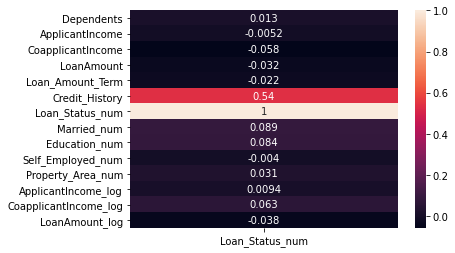

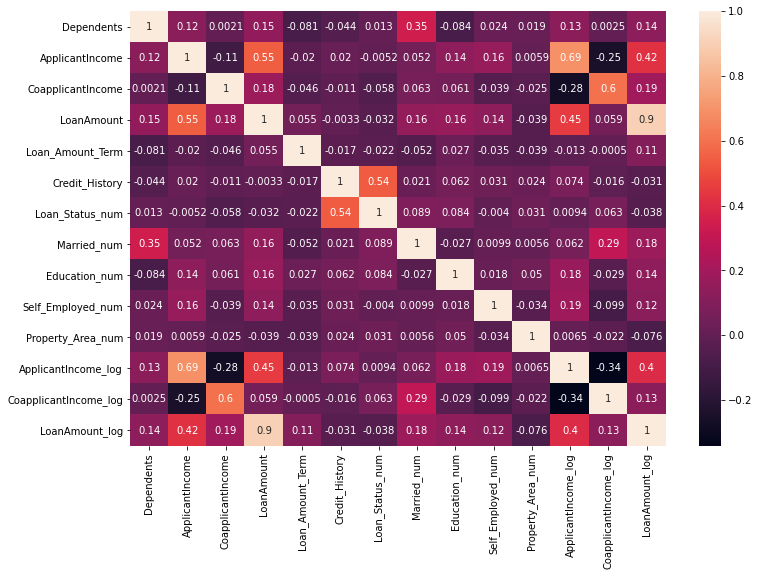

In [656]:
data["Loan_Status_num"] = data["Loan_Status"].replace({"Y":1, "N":0})
data["Gender_num"] = data["Gender"].replace({"Male":1, "Female":0})
data["Self_Employed_num"] = data["Self_Employed"].replace({"Yes":1, "No":0})
data["LoanAmount_log"] = np.log1p(data["LoanAmount"])

sns.heatmap(data.corr()[['Loan_Status_num']],annot=True)

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [658]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_num,Gender_num,Married_num,Education_num,Self_Employed_num,Property_Area_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,1.0,1,0.0,1,0,2,8.674197,0.000000,4.795791
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0,1,1.0,1,0,0,8.430327,7.319202,4.859812
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,1,1.0,1,1,2,8.006701,0.000000,4.204693
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0,1,1.0,0,0,2,7.857094,7.765993,4.795791
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0,1,0.0,1,0,2,8.699681,0.000000,4.955827


In [657]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Loan_Status_num', 'Gender_num', 'Married_num', 'Education_num',
       'Self_Employed_num', 'Property_Area_num', 'ApplicantIncome_log',
       'CoapplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

In [659]:
data_preprocessed = data.drop(columns=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Status","Gender_num","Married_num","Education_num","Self_Employed_num","Property_Area_num"])
data_preprocessed.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status_num', 'ApplicantIncome_log', 'CoapplicantIncome_log',
       'LoanAmount_log'],
      dtype='object')

In [661]:
data_preprocessed.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,Male,No,0.0,Graduate,No,360.0,1.0,Urban,1.0,8.674197,0.000000,4.795791
1,LP001003,Male,Yes,1.0,Graduate,No,360.0,1.0,Rural,0.0,8.430327,7.319202,4.859812
2,LP001005,Male,Yes,0.0,Graduate,Yes,360.0,1.0,Urban,1.0,8.006701,0.000000,4.204693
3,LP001006,Male,Yes,0.0,Not Graduate,No,360.0,1.0,Urban,1.0,7.857094,7.765993,4.795791
4,LP001008,Male,No,0.0,Graduate,No,360.0,1.0,Urban,1.0,8.699681,0.000000,4.955827


In [663]:
data_preprocessed.shape, data_preprocessed.index

((978, 13),
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             971, 972, 973, 974, 975, 976, 977, 978, 979, 980],
            dtype='int64', length=978))

In [665]:
data_preprocessed["Loan_Amount_Term"] = data_preprocessed["Loan_Amount_Term"].astype('str')

In [666]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 980
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                978 non-null    object 
 1   Gender                 978 non-null    object 
 2   Married                978 non-null    object 
 3   Dependents             978 non-null    float64
 4   Education              978 non-null    object 
 5   Self_Employed          978 non-null    object 
 6   Loan_Amount_Term       978 non-null    object 
 7   Credit_History         978 non-null    float64
 8   Property_Area          978 non-null    object 
 9   Loan_Status_num        611 non-null    float64
 10  ApplicantIncome_log    978 non-null    float64
 11  CoapplicantIncome_log  978 non-null    float64
 12  LoanAmount_log         978 non-null    float64
dtypes: float64(6), object(7)
memory usage: 107.0+ KB


In [668]:
num_col = data_preprocessed.select_dtypes(include=np.number).columns
cat_col = data_preprocessed.select_dtypes(exclude=np.number).drop(columns ='Loan_ID').columns
cat_col, num_col

(Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term',
        'Property_Area'],
       dtype='object'),
 Index(['Dependents', 'Credit_History', 'Loan_Status_num',
        'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log'],
       dtype='object'))

In [669]:
cat_col_tranform = pd.get_dummies(data_preprocessed[cat_col])
cat_col_tranform

,Gender_Female,Gender_Male,Gender_unknown,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_279.0,Loan_Amount_Term_300.0,Loan_Amount_Term_303.6,Loan_Amount_Term_312.0,Loan_Amount_Term_320.0,Loan_Amount_Term_322.3636363636364,Loan_Amount_Term_340.0,Loan_Amount_Term_342.0,Loan_Amount_Term_343.3333333333333,Loan_Amount_Term_345.0,Loan_Amount_Term_346.95652173913044,Loan_Amount_Term_350.0,Loan_Amount_Term_351.42857142857144,Loan_Amount_Term_353.0769230769231,Loan_Amount_Term_357.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_370.90909090909093,Loan_Amount_Term_480.0,Loan_Amount_Term_6.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
977,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
978,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
979,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [671]:
data_preprocessed_cat_num = pd.concat([data_preprocessed['Loan_ID'],cat_col_tranform, data_preprocessed[num_col]], axis = 1)
data_preprocessed_cat_num

,Loan_ID,Gender_Female,Gender_Male,Gender_unknown,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_279.0,Loan_Amount_Term_300.0,Loan_Amount_Term_303.6,Loan_Amount_Term_312.0,Loan_Amount_Term_320.0,Loan_Amount_Term_322.3636363636364,Loan_Amount_Term_340.0,Loan_Amount_Term_342.0,Loan_Amount_Term_343.3333333333333,Loan_Amount_Term_345.0,Loan_Amount_Term_346.95652173913044,Loan_Amount_Term_350.0,Loan_Amount_Term_351.42857142857144,Loan_Amount_Term_353.0769230769231,Loan_Amount_Term_357.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_370.90909090909093,Loan_Amount_Term_480.0,Loan_Amount_Term_6.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,Credit_History,Loan_Status_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,1.0,8.674197,0.000000,4.795791
1,LP001003,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.0,1.0,0.0,8.430327,7.319202,4.859812
2,LP001005,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,1.0,8.006701,0.000000,4.204693
3,LP001006,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,1.0,7.857094,7.765993,4.795791
4,LP001008,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,1.0,8.699681,0.000000,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3.0,1.0,NaN,8.296547,7.483244,4.736198
977,LP002975,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,NaN,8.333030,6.565265,4.753590
978,LP002980,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,1.0,NaN,8.086718,7.597898,4.844187
979,LP002986,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,1.0,NaN,8.517393,7.780721,5.068904


In [673]:
train_preprocessed = data_preprocessed_cat_num.dropna(subset=["Loan_Status_num"])
test_preprocessed = data_preprocessed_cat_num[data_preprocessed_cat_num["Loan_Status_num"].isna()]
test_preprocessed = test_preprocessed.drop(columns="Loan_Status_num")
train_preprocessed.shape, test_preprocessed.shape, train_preprocessed.index, test_preprocessed.index

((611, 45),
 (367, 44),
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             604, 605, 606, 607, 608, 609, 610, 611, 612, 613],
            dtype='int64', length=611),
 Int64Index([614, 615, 616, 617, 618, 619, 620, 621, 622, 623,
             ...
             971, 972, 973, 974, 975, 976, 977, 978, 979, 980],
            dtype='int64', length=367))

In [675]:
train_preprocessed.head()

,Loan_ID,Gender_Female,Gender_Male,Gender_unknown,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_279.0,Loan_Amount_Term_300.0,Loan_Amount_Term_303.6,Loan_Amount_Term_312.0,Loan_Amount_Term_320.0,Loan_Amount_Term_322.3636363636364,Loan_Amount_Term_340.0,Loan_Amount_Term_342.0,Loan_Amount_Term_343.3333333333333,Loan_Amount_Term_345.0,Loan_Amount_Term_346.95652173913044,Loan_Amount_Term_350.0,Loan_Amount_Term_351.42857142857144,Loan_Amount_Term_353.0769230769231,Loan_Amount_Term_357.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_370.90909090909093,Loan_Amount_Term_480.0,Loan_Amount_Term_6.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,Credit_History,Loan_Status_num,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,1.0,8.674197,0.000000,4.795791
1,LP001003,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.0,1.0,0.0,8.430327,7.319202,4.859812
2,LP001005,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,1.0,8.006701,0.000000,4.204693
3,LP001006,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,1.0,7.857094,7.765993,4.795791
4,LP001008,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,1.0,8.699681,0.000000,4.955827


In [676]:
test_preprocessed.head()

,Loan_ID,Gender_Female,Gender_Male,Gender_unknown,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_279.0,Loan_Amount_Term_300.0,Loan_Amount_Term_303.6,Loan_Amount_Term_312.0,Loan_Amount_Term_320.0,Loan_Amount_Term_322.3636363636364,Loan_Amount_Term_340.0,Loan_Amount_Term_342.0,Loan_Amount_Term_343.3333333333333,Loan_Amount_Term_345.0,Loan_Amount_Term_346.95652173913044,Loan_Amount_Term_350.0,Loan_Amount_Term_351.42857142857144,Loan_Amount_Term_353.0769230769231,Loan_Amount_Term_357.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_370.90909090909093,Loan_Amount_Term_480.0,Loan_Amount_Term_6.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,Credit_History,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
614,LP001015,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,8.651899,0.000000,4.709530
615,LP001022,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1.0,1.0,8.031710,7.313887,4.844187
616,LP001031,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2.0,1.0,8.517393,7.496097,5.342334
617,LP001035,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2.0,1.0,7.758333,7.842671,4.615121
618,LP001051,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,8.094684,0.000000,4.369448


In [678]:
train_preprocessed.to_csv("train_preprocessed.csv", index = False)
test_preprocessed.to_csv("test_preprocessed.csv", index = False)

### Modelling

In [679]:
X = train_preprocessed.drop(columns=["Loan_ID","Loan_Status_num"])
y = train_preprocessed["Loan_Status_num"]

In [680]:
model = LogisticRegression()
model.fit(X,y)

D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [681]:
model.intercept_, model.coef_

(array([-1.93524152]),
 array([[ 0.04609994,  0.00522295, -0.05684847, -0.20073057,  0.19520499,
          0.18071248, -0.18623806,  0.00798728, -0.01351286,  0.19081574,
          0.31767501,  0.31175427, -0.14477705,  0.        ,  0.08047295,
         -0.05140607,  0.12524885,  0.        , -0.15922132,  0.21400038,
          0.54355443,  0.        , -0.07307649, -0.11420961,  0.        ,
         -0.05394006, -0.1591218 ,  0.        , -1.07529421,  0.1689119 ,
          0.3163477 , -0.80061305,  0.        ,  0.45595019, -0.09859732,
         -0.33394481,  0.4976525 , -0.16923326,  0.05655917,  3.34905847,
          0.21948055,  0.05215198, -0.51864004]]))

<AxesSubplot:>

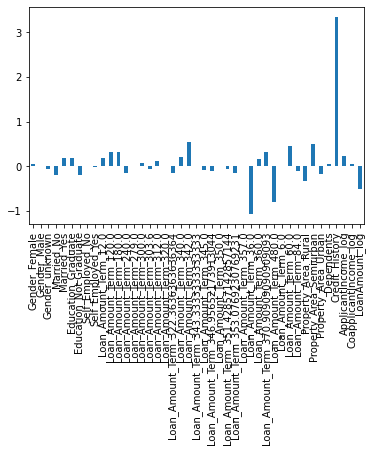

In [683]:
pd.Series(data=model.coef_[0],index=X.columns).plot(kind='bar')

In [719]:
def print_score(y_act,y_pred,label) :
    print(label, "Accuracy score  :", accuracy_score(y_act,y_pred))
    print(label, "Recall score    :", recall_score(y_act,y_pred))
    print(label, "Precision score :", precision_score(y_act,y_pred))
    print(label, "F1 score        :", f1_score(y_act,y_pred))
    print(label, "ROC_AUC score   :", roc_auc_score(y_act,y_pred))
    print(label, "Confusion Matrix:\n", confusion_matrix(y_act,y_pred))
    print(label, "Classification Report\n", classification_report(y_act,y_pred))    
#print_score(y,y_train_pred,"Train")

In [1050]:
def build_model(model,X,y,label):
    #model = LogisticRegression()
    model.fit(X,y)
    y_train_pred = model.predict(X)
    pd.Series(data=model.coef_[0],index=X.columns).plot(kind='bar')
    print_score(y,y_train_pred,label)

In [702]:
y_train_pred = model.predict(X)
print("Train Accuracy score  :", accuracy_score(y,y_train_pred))
print("Train Recall score    :", recall_score(y,y_train_pred))
print("Train Precision score :", precision_score(y,y_train_pred))
print("Train F1 score        :", f1_score(y,y_train_pred))
print("Train ROC_AUC score   :", roc_auc_score(y,y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y,y_train_pred))
print("Train Classification Report\n", classification_report(y,y_train_pred))


Train Accuracy score  : 0.8117839607201309
Train Recall score    : 0.9785202863961814
Train Precision score : 0.7945736434108527
Train F1 score        : 0.8770053475935828
Train ROC_AUC score   : 0.713218476531424
Train Confusion Matrix:
 [[ 86 106]
 [  9 410]]
Train Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.45      0.60       192
         1.0       0.79      0.98      0.88       419

    accuracy                           0.81       611
   macro avg       0.85      0.71      0.74       611
weighted avg       0.83      0.81      0.79       611



In [701]:
print("Recall postitive :",86/192)    # Recall postitive
print("Recall negative  :",410/419)   # Recall negative
print()
print("Precision postitive :",86/95) # Precision postitive
print("Precision negative  :",410/516)# Precision negative

Recall postitive : 0.4479166666666667
Recall negative  : 0.9785202863961814

Precision postitive : 0.9052631578947369
Precision negative  : 0.7945736434108527


In [690]:
test_X = test_preprocessed.drop(columns='Loan_ID')
y_test_pred = model.predict(test_X)
submission['Loan_Status'] = y_test_pred
submission['Loan_Status'].replace({1:"Y",0:"N"}, inplace = True)
submission.to_csv("Loan_logistic.csv",index = False)

In [ ]:
#submitted with above activity 
#0.777777778

### Using Regularization

D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy score  : 0.8117839607201309
Train Recall score    : 0.9785202863961814
Train Precision score : 0.7945736434108527
Train F1 score        : 0.8770053475935828
Train ROC_AUC score   : 0.713218476531424
Train Confusion Matrix:
 [[ 86 106]
 [  9 410]]
Train Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.45      0.60       192
         1.0       0.79      0.98      0.88       419

    accuracy                           0.81       611
   macro avg       0.85      0.71      0.74       611
weighted avg       0.83      0.81      0.79       611



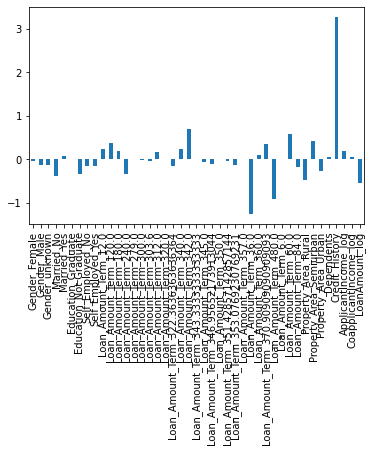

In [736]:
model = LogisticRegression(random_state=0, class_weight='balanced')
build_model(model,X,y,"Train")

In [782]:
#from sklearn.logisticRegressionClassifier import LogisticRegression
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(penalty='l1', solver='liblinear')
sc=[50, 1.3,10, 1,5, 2,0.1, 0.01, 0.05, 0.005]
for it in sc:
    model = LogisticRegression(penalty='elasticnet', l1_ratio=0.2, C=it, solver='saga')#, random_state=0, class_weight='balanced')
#    model = LogisticRegression(penalty='l1', C=it, solver='liblinear', random_state=0, class_weight='balanced')
    model.fit(X,y)
    print("Score :", model.score(X,y),it)
    #build_model(model,X,y,"Train")

D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached 

Score : 0.8101472995090017 50
Score : 0.8085106382978723 1.3
Score : 0.8101472995090017 10
Score : 0.8085106382978723 1


D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Score : 0.8101472995090017 5
Score : 0.8101472995090017 2
Score : 0.8085106382978723 0.1
Score : 0.6857610474631751 0.01
Score : 0.8085106382978723 0.05
Score : 0.6857610474631751 0.005


D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Train Accuracy score  : 0.8117839607201309
Train Recall score    : 0.9785202863961814
Train Precision score : 0.7945736434108527
Train F1 score        : 0.8770053475935828
Train ROC_AUC score   : 0.713218476531424
Train Confusion Matrix:
 [[ 86 106]
 [  9 410]]
Train Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.45      0.60       192
         1.0       0.79      0.98      0.88       419

    accuracy                           0.81       611
   macro avg       0.85      0.71      0.74       611
weighted avg       0.83      0.81      0.79       611



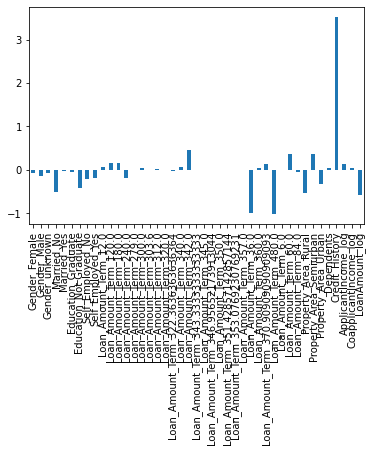

In [788]:
#model = LogisticRegression(penalty='elasticnet', l1_ratio=0.4, C=0.05, solver='saga', random_state=0, class_weight='balanced')
model = LogisticRegression(penalty='elasticnet', l1_ratio=0.3, C=2, solver='saga', random_state=0, class_weight='balanced')
build_model(model,X,y,"Train")
test_X = test_preprocessed.drop(columns='Loan_ID')
y_test_pred = model.predict(test_X)
submission['Loan_Status'] = y_test_pred
submission['Loan_Status'].replace({1:"Y",0:"N"}, inplace = True)
submission.to_csv("Loan_logistic_elastic_v1.csv",index = False)

In [815]:
#mode()[0]
#data.groupby("LoanAmount").Loan_Amount_Term.transform(lambda x: x.fillna(x.mean()))

In [967]:
data = pd.concat([train,test])
data["Loan_Status_num"] = data["Loan_Status"].replace({"Y":1, "N":0})
data["Gender_num"] = data["Gender"].replace({"Male":1, "Female":0})
data["Married_num"] = data["Married"].replace({"Yes":1, "No":0})
data["Education_num"] = data["Education"].replace({"Graduate":1, "Not Graduate":0})
data["Self_Employed_num"] = data["Self_Employed"].replace({"Yes":1, "No":0})
data["Property_Area_num"] = data["Property_Area"].replace({"Urban":2, "Semiurban":1, "Rural":0})

'''
data["ApplicantIncome_log"] = np.log1p(data["ApplicantIncome"])
data["CoapplicantIncome_log"] = np.log1p(data["CoapplicantIncome"])
data["LoanAmount_log"] = np.log1p(data["LoanAmount"])

data['total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['total_income_by_loanAmt'] = data['total_income'] / data['LoanAmount']
data['ApplicantIncome_by_loanAmt'] = data['ApplicantIncome'] / data['LoanAmount']
data['Loan_Amount_Term_By_amt'] = data['LoanAmount'] / data['Loan_Amount_Term']

data["total_income_by_loanAmt_log"] = np.log1p(data["total_income_by_loanAmt"])
data["Loan_Amount_Term_By_amt_log"] = np.log1p(data["Loan_Amount_Term_By_amt"])
'''
data["Gender"].fillna("unknown",inplace=True)

data.dropna(subset=["Married"],inplace=True)
data.reset_index().drop(columns="index")

data["Dependents"].replace({'3+':3}, inplace = True)
data['Dependents'] = data['Dependents'].astype('float')
data["Dependents"].fillna(0, inplace = True)
data["Dependents"] = data["Dependents"].astype('str')

data.loc[data["Self_Employed"].isna(),"Self_Employed"] = data[data["Self_Employed"].isna()]["ApplicantIncome"].apply(lambda x: "Yes" if x>5000 else "No")

data["LoanAmount"] = data.groupby("Property_Area").LoanAmount.transform(lambda x: x.fillna(x.median()))

data['Loan_Amount_Term'].fillna(value=data['Loan_Amount_Term'].mode()[0],inplace=True)

bins = [0,120,180,240,300,360,480]
labels = ['0-120','120-180','180-240','240-300','300-360','360-480']
data["Loan_Amount_Term_bin"] = pd.cut(data["Loan_Amount_Term"], bins=bins, labels=labels)

data["Credit_History"].fillna(1, inplace = True)

data["Loan_Status_num"] = data["Loan_Status"].replace({"Y":1, "N":0})
data["Gender_num"] = data["Gender"].replace({"Male":1, "Female":0})
data["Self_Employed_num"] = data["Self_Employed"].replace({"Yes":1, "No":0})

'''
data["LoanAmount_log"] = np.log1p(data["LoanAmount"])
data["ApplicantIncome_log"] = np.log1p(data["ApplicantIncome"])
data["CoapplicantIncome_log"] = np.log1p(data["CoapplicantIncome"])

data['total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['total_income_by_loanAmt'] = data['total_income'] / data['LoanAmount']
data['ApplicantIncome_by_loanAmt'] = data['ApplicantIncome'] / data['LoanAmount']
data['Loan_Amount_Term_By_amt'] = data['LoanAmount'] / data['Loan_Amount_Term']
data["total_income_by_loanAmt_log"] = np.log1p(data["total_income_by_loanAmt"])
data["Loan_Amount_Term_By_amt_log"] = np.log1p(data["Loan_Amount_Term_By_amt"])
'''
[print(data[i].isna().sum(),"(",round((data[i].isnull().sum()/len(data[i]))*100,2),"%)-->",i) for i in data.columns if data[i].isna().sum()>0]


367 ( 37.53 %)--> Loan_Status
367 ( 37.53 %)--> Loan_Status_num


[None, None]

In [988]:
#"ApplicantIncome","CoapplicantIncome","LoanAmount"
data_preprocessed= data.drop(columns=["Loan_Status","Loan_Amount_Term",\
                                       "Gender_num","Married_num","Education_num","Self_Employed_num","Property_Area_num"])
#,\
#                                      "total_income","ApplicantIncome_by_loanAmt"])
data_preprocessed.columns
data_preprocessed.reset_index(inplace=True)
data_preprocessed.drop(columns=['index'],inplace=True)

#data_preprocessed["Loan_Amount_Term"] = data_preprocessed["Loan_Amount_Term"].astype('str')

num_col = data_preprocessed.select_dtypes(include=np.number).columns
cat_col = data_preprocessed.select_dtypes(exclude=np.number).drop(columns ='Loan_ID').columns
cat_col, num_col

cat_col_tranform = pd.get_dummies(data_preprocessed[cat_col])
cat_col_tranform

scaler = MinMaxScaler()
num_col_transform = pd.DataFrame(scaler.fit_transform(data_preprocessed[num_col]), columns=num_col)

#print(num_col_transform)
#print(data_preprocessed[num_col])
print(data_preprocessed['Loan_ID'].shape,cat_col_tranform.shape, num_col_transform.shape)
print(data_preprocessed['Loan_ID'].index,cat_col_tranform.index, num_col_transform.index)

data_preprocessed_cat_num = pd.concat([data_preprocessed['Loan_ID'],cat_col_tranform, num_col_transform], axis = 1)
data_preprocessed_cat_num

train_preprocessed = data_preprocessed_cat_num.dropna(subset=["Loan_Status_num"])
test_preprocessed = data_preprocessed_cat_num[data_preprocessed_cat_num["Loan_Status_num"].isna()]
test_preprocessed = test_preprocessed.drop(columns="Loan_Status_num")
train_preprocessed.shape, test_preprocessed.shape, train_preprocessed.index, test_preprocessed.index

train_preprocessed.to_csv("train_preprocessed_bin_fe.csv", index = False)
test_preprocessed.to_csv("test_preprocessed_bin_fe.csv", index = False)
train_preprocessed.head()

(978,) (978, 22) (978, 5)
RangeIndex(start=0, stop=978, step=1) RangeIndex(start=0, stop=978, step=1) RangeIndex(start=0, stop=978, step=1)


,Loan_ID,Gender_Female,Gender_Male,Gender_unknown,Married_No,Married_Yes,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_bin_0-120,Loan_Amount_Term_bin_120-180,Loan_Amount_Term_bin_180-240,Loan_Amount_Term_bin_240-300,Loan_Amount_Term_bin_300-360,Loan_Amount_Term_bin_360-480,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status_num
0,LP001002,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0.072210,0.000000,0.160637,1.0,1.0
1,LP001003,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0.056580,0.036192,0.172214,1.0,0.0
2,LP001005,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0.037037,0.000000,0.082489,1.0,1.0
3,LP001006,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0.031889,0.056592,0.160637,1.0,1.0
4,LP001008,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0.074074,0.000000,0.191027,1.0,1.0


In [990]:
X.head()

,Gender_Female,Gender_Male,Gender_unknown,Married_No,Married_Yes,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_bin_0-120,Loan_Amount_Term_bin_120-180,Loan_Amount_Term_bin_180-240,Loan_Amount_Term_bin_240-300,Loan_Amount_Term_bin_300-360,Loan_Amount_Term_bin_360-480,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0.072210,0.000000,0.160637,1.0
1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0.056580,0.036192,0.172214,1.0
2,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0.037037,0.000000,0.082489,1.0
3,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0.031889,0.056592,0.160637,1.0
4,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0.074074,0.000000,0.191027,1.0


Train Accuracy score  : 0.8117839607201309
Train Recall score    : 0.9785202863961814
Train Precision score : 0.7945736434108527
Train F1 score        : 0.8770053475935828
Train ROC_AUC score   : 0.713218476531424
Train Confusion Matrix:
 [[ 86 106]
 [  9 410]]
Train Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.45      0.60       192
         1.0       0.79      0.98      0.88       419

    accuracy                           0.81       611
   macro avg       0.85      0.71      0.74       611
weighted avg       0.83      0.81      0.79       611

Y    306
N     61
Name: Loan_Status, dtype: int64


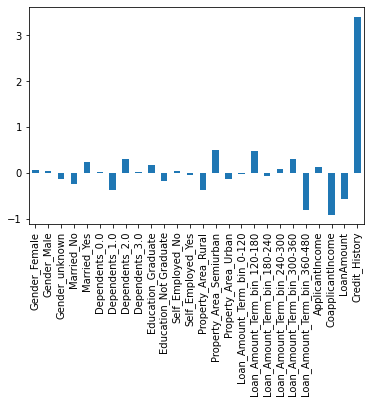

In [996]:
#after binning,scaling
X = train_preprocessed.drop(columns=["Loan_ID","Loan_Status_num"])
y = train_preprocessed["Loan_Status_num"]
model = LogisticRegression()#(random_state=0, class_weight='balanced')
build_model(model,X,y,"Train")
test_X = test_preprocessed.drop(columns='Loan_ID')
y_test_pred = model.predict(test_X)
submission['Loan_Status'] = y_test_pred
submission['Loan_Status'].replace({1:"Y",0:"N"}, inplace = True)
print(submission['Loan_Status'].value_counts())
#submission.to_csv("Loan_logistic_fe_bin_scl v5.csv",index = False)
#0.77777

D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Train Accuracy score  : 0.8117839607201309
Train Recall score    : 0.9785202863961814
Train Precision score : 0.7945736434108527
Train F1 score        : 0.8770053475935828
Train ROC_AUC score   : 0.713218476531424
Train Confusion Matrix:
 [[ 86 106]
 [  9 410]]
Train Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.45      0.60       192
         1.0       0.79      0.98      0.88       419

    accuracy                           0.81       611
   macro avg       0.85      0.71      0.74       611
weighted avg       0.83      0.81      0.79       611

Y    305
N     62
Name: Loan_Status, dtype: int64


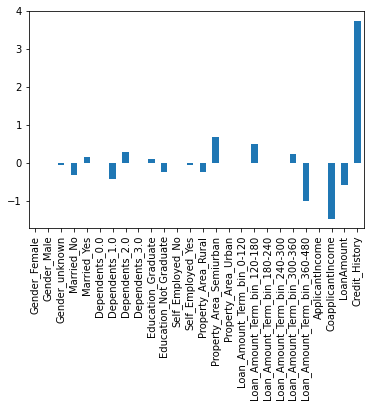

In [997]:
#after binning & scaling 
X = train_preprocessed.drop(columns=["Loan_ID","Loan_Status_num"])
y = train_preprocessed["Loan_Status_num"]
model = LogisticRegression(penalty='elasticnet', l1_ratio=0.6, C=2, solver='saga')#, random_state=0, class_weight='balanced')
build_model(model,X,y,"Train")
test_X = test_preprocessed.drop(columns='Loan_ID')
y_test_pred = model.predict(test_X)
submission['Loan_Status'] = y_test_pred
submission['Loan_Status'].replace({1:"Y",0:"N"}, inplace = True)
print(submission['Loan_Status'].value_counts())
#submission.to_csv("Loan_logistic_fe_bin_scl_elastic v5.csv",index = False)
#0.78472

In [ ]:
#the above submit gave 0.78472

In [ ]:
#before binning & scaling (scaling done by log1p)
model = LogisticRegression(penalty='elasticnet', l1_ratio=0.6, C=2, solver='saga')#, random_state=0, class_weight='balanced')
build_model(model,X,y,"Train")
test_X = test_preprocessed.drop(columns='Loan_ID')
y_test_pred = model.predict(test_X)
submission['Loan_Status'] = y_test_pred
submission['Loan_Status'].replace({1:"Y",0:"N"}, inplace = True)
submission['Loan_Status'].value_counts()
#submission.to_csv("Loan_logistic_fe_elastic_v2.csv",index = False)

D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy score  : 0.8117839607201309
Train Recall score    : 0.9785202863961814
Train Precision score : 0.7945736434108527
Train F1 score        : 0.8770053475935828
Train ROC_AUC score   : 0.713218476531424
Train Confusion Matrix:
 [[ 86 106]
 [  9 410]]
Train Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.45      0.60       192
         1.0       0.79      0.98      0.88       419

    accuracy                           0.81       611
   macro avg       0.85      0.71      0.74       611
weighted avg       0.83      0.81      0.79       611



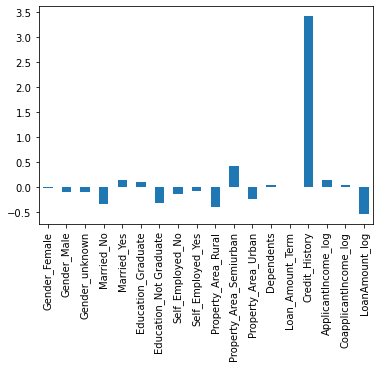

In [818]:
#before binning & scaling (scaling done by log1p)
X = train_preprocessed.drop(columns=["Loan_ID","Loan_Status_num"])
y = train_preprocessed["Loan_Status_num"]
model = LogisticRegression()#(random_state=0, class_weight='balanced')
build_model(model,X,y,"Train")

Train Accuracy score  : 0.8117839607201309
Train Recall score    : 0.9785202863961814
Train Precision score : 0.7945736434108527
Train F1 score        : 0.8770053475935828
Train ROC_AUC score   : 0.713218476531424
Train Confusion Matrix:
 [[ 86 106]
 [  9 410]]
Train Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.45      0.60       192
         1.0       0.79      0.98      0.88       419

    accuracy                           0.81       611
   macro avg       0.85      0.71      0.74       611
weighted avg       0.83      0.81      0.79       611



D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Y    367
Name: Loan_Status, dtype: int64

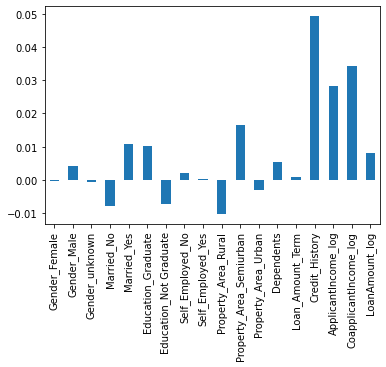

In [819]:
#before binning & scaling (scaling done by log1p)
model = LogisticRegression(penalty='elasticnet', l1_ratio=0.6, C=2, solver='saga')#, random_state=0, class_weight='balanced')
build_model(model,X,y,"Train")
test_X = test_preprocessed.drop(columns='Loan_ID')
y_test_pred = model.predict(test_X)
submission['Loan_Status'] = y_test_pred
submission['Loan_Status'].replace({1:"Y",0:"N"}, inplace = True)
submission['Loan_Status'].value_counts()
#submission.to_csv("Loan_logistic_fe_elastic_v2.csv",index = False)

In [822]:
train["Loan_Status"].value_counts()/len(train["Loan_Status"])*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [ ]:
## using Kfold cross validator

In [827]:
kf = KFold(n_splits=6)
print(kf)

KFold(n_splits=6, random_state=None, shuffle=False)


In [841]:
print(y.value_counts()/len(y)*100)

print(X["Dependents"].value_counts())
print(train["Loan_Amount_Term"].value_counts())
print("Mode=",train['Loan_Amount_Term'].mode()[0])
print("Mean=",train['Loan_Amount_Term'].mean())
print(X["Loan_Amount_Term"].value_counts())
print("Mode=",X['Loan_Amount_Term'].mode()[0])
print("Mean=",X['Loan_Amount_Term'].mean())

1.0    68.576105
0.0    31.423895
Name: Loan_Status_num, dtype: float64
0.0    357
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Mode= 360.0
Mean= 342.0
360.000000    512
180.000000     44
300.000000     15
480.000000     14
84.000000       4
120.000000      3
240.000000      3
60.000000       2
36.000000       2
342.000000      2
12.000000       1
346.956522      1
312.000000      1
345.000000      1
303.600000      1
370.909091      1
322.363636      1
340.000000      1
351.428571      1
353.076923      1
Name: Loan_Amount_Term, dtype: int64
Mode= 360.0
Mean= 341.75013869642777


In [828]:
X#for train_index, test_index in kf.split(X):

,Gender_Female,Gender_Male,Gender_unknown,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,Loan_Amount_Term,Credit_History,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,0,1,0,1,0,1,0,1,0,0,0,1,0.0,360.0,1.0,8.674197,0.000000,4.795791
1,0,1,0,0,1,1,0,1,0,1,0,0,1.0,360.0,1.0,8.430327,7.319202,4.859812
2,0,1,0,0,1,1,0,0,1,0,0,1,0.0,360.0,1.0,8.006701,0.000000,4.204693
3,0,1,0,0,1,0,1,1,0,0,0,1,0.0,360.0,1.0,7.857094,7.765993,4.795791
4,0,1,0,1,0,1,0,1,0,0,0,1,0.0,360.0,1.0,8.699681,0.000000,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,1,0,1,0,1,0,0,0.0,360.0,1.0,7.972811,0.000000,4.276666
610,0,1,0,0,1,1,0,1,0,1,0,0,3.0,180.0,1.0,8.320448,0.000000,3.713572
611,0,1,0,0,1,1,0,1,0,0,0,1,1.0,360.0,1.0,8.996280,5.484797,5.537334
612,0,1,0,0,1,1,0,1,0,0,0,1,2.0,360.0,1.0,8.933796,0.000000,5.236442


<AxesSubplot:ylabel='Frequency'>

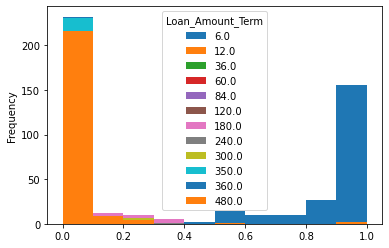

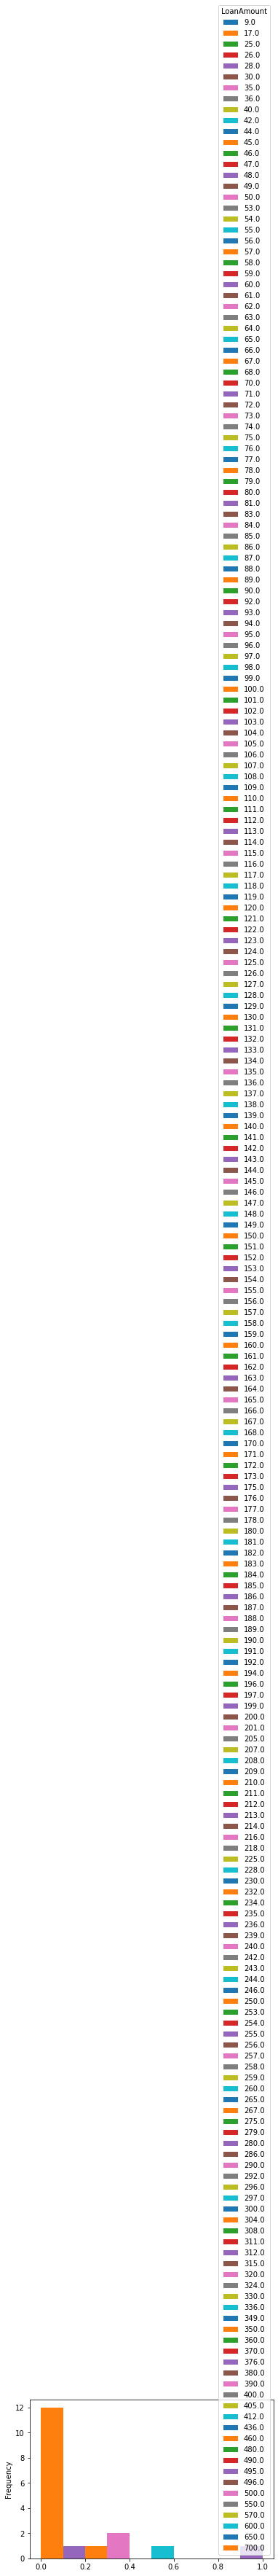

In [848]:
pd.crosstab(data2["LoanAmount"],data2["Loan_Amount_Term"]).div(pd.crosstab(data2["LoanAmount"],data2["Loan_Amount_Term"]).sum(1),axis = 0).plot(kind = "hist")#, stacked = "True")

pd.crosstab(data2["Loan_Amount_Term"],data2["LoanAmount"]).div(pd.crosstab(data2["Loan_Amount_Term"],data2["LoanAmount"]).sum(1),axis = 0).plot(kind = "hist")#, stacked = "True")

In [934]:
data2 = pd.concat([train,test])

def range_calc(data,grouped_col,groupby_col):
    range_calc = pd.DataFrame(data[grouped_col].value_counts().sort_index())
    range_calc = pd.concat([range_calc,
                            pd.DataFrame(data.groupby(grouped_col)[groupby_col].min()),
                            pd.DataFrame(data.groupby(grouped_col)[groupby_col].max()),
                            pd.DataFrame(data.groupby(grouped_col)[groupby_col].sum()),
                            pd.DataFrame(data.groupby(grouped_col)[groupby_col].count()),
                            pd.DataFrame(data.groupby(grouped_col)[groupby_col].mean()),
                            pd.DataFrame(data.groupby(grouped_col)[groupby_col].median())                        
                           ],axis=1, ignore_index=False)
    range_calc.index.names = [grouped_col]
    range_calc.columns=['value_count','min','max','sum','count','mean','median']
    return range_calc

'''
display(pd.DataFrame(data2.groupby("Loan_Amount_Term").LoanAmount.min()))
display(pd.DataFrame(data2.groupby("Loan_Amount_Term")["LoanAmount"].min()))

range_calc = pd.DataFrame(data2["Loan_Amount_Term"].value_counts().sort_index())
range_calc = pd.concat([range_calc,
                        pd.DataFrame(data2.groupby("Loan_Amount_Term").LoanAmount.min()),
                        pd.DataFrame(data2.groupby("Loan_Amount_Term").LoanAmount.max()),
                        pd.DataFrame(data2.groupby("Loan_Amount_Term").LoanAmount.sum()),
                        pd.DataFrame(data2.groupby("Loan_Amount_Term").LoanAmount.count()),
                        pd.DataFrame(data2.groupby("Loan_Amount_Term").LoanAmount.mean()),
                        pd.DataFrame(data2.groupby("Loan_Amount_Term").LoanAmount.median())                        
                       ],axis=1, ignore_index=False)
range_calc.index.names = ['Loan_Amount_Term']
range_calc.columns=['value_count','min','max','sum','count','mean','median']
display(range_calc.head(25))
'''
range_calc(data2,"Loan_Amount_Term","ApplicantIncome")

,value_count,min,max,sum,count,mean,median
Loan_Amount_Term,,,,,,,
6.0,1,2875,2875,2875,1,2875.000000,2875.0
12.0,2,4625,10890,15515,2,7757.500000,7757.5
36.0,3,2747,3481,9586,3,3195.333333,3358.0
60.0,3,2965,7100,14148,3,4716.000000,4083.0
84.0,7,2066,5746,26913,7,3844.714286,4000.0
120.0,4,1299,3620,11778,4,2944.500000,3429.5
180.0,66,416,63337,394558,66,5978.151515,3764.5
240.0,8,2360,13633,45893,8,5736.625000,3792.0
300.0,20,1599,51763,139050,20,6952.500000,3633.5


In [936]:
range_calc(data2,"Loan_Amount_Term","ApplicantIncome")
range_calc(data2,"Loan_Amount_Term","LoanAmount")

,value_count,min,max,sum,count,mean,median
Loan_Amount_Term,,,,,,,
6.0,1,95.0,95.0,95.0,1,95.000000,95.0
12.0,2,111.0,260.0,371.0,2,185.500000,185.5
36.0,3,80.0,155.0,353.0,3,117.666667,118.0
60.0,3,125.0,155.0,419.0,3,139.666667,139.0
84.0,7,83.0,172.0,848.0,7,121.142857,108.0
120.0,4,17.0,80.0,147.0,4,36.750000,25.0
180.0,66,28.0,600.0,8392.0,64,131.125000,118.0
240.0,8,50.0,280.0,902.0,7,128.857143,100.0
300.0,20,60.0,700.0,3325.0,20,166.250000,135.5


In [962]:
data2[data2["Loan_Amount_Term"].isna()][["LoanAmount","ApplicantIncome"]]

,LoanAmount,ApplicantIncome
19,115.0,2600
36,100.0,1828
44,96.0,4695
45,88.0,3410
73,95.0,4755
112,152.0,3572
165,182.0,3707
197,120.0,1907
223,175.0,7578
232,120.0,3189


In [937]:
data2['Loan_Amount_Term'].value_counts(bins=6)

(322.0, 401.0]                824
(164.0, 243.0]                 74
(401.0, 480.0]                 23
(243.0, 322.0]                 20
(5.5249999999999995, 85.0]     16
(85.0, 164.0]                   4
Name: Loan_Amount_Term, dtype: int64

In [956]:
#binning - Loan_Amount_Term

def binning(data, bins, labels):
    bin_data = pd.cut(data2["Loan_Amount_Term"], bins=bins, labels=labels)
    return bin_data

bins = [0,120,180,240,300,360,480]
labels = ['0-120','120-180','180-240','240-300','300-360','360-480']
#data2["Loan_Amount_Term_bin"] = pd.cut(data2["Loan_Amount_Term"], bins=bins, labels=labels)

data2["Loan_Amount_Term_bin"] = binning(data2["Loan_Amount_Term"],bins,labels)
display(data2["Loan_Amount_Term_bin"].value_counts().sort_index())
display(data2["Loan_Amount_Term"].value_counts().sort_index())

0-120       20
120-180     66
180-240      8
240-300     20
300-360    824
360-480     23
Name: Loan_Amount_Term_bin, dtype: int64

6.0        1
12.0       2
36.0       3
60.0       3
84.0       7
120.0      4
180.0     66
240.0      8
300.0     20
350.0      1
360.0    823
480.0     23
Name: Loan_Amount_Term, dtype: int64

In [964]:


print("Null=",data2['Loan_Amount_Term'].isna().sum())
print("Mode=",data2['Loan_Amount_Term'].mode()[0])
data2['Loan_Amount_Term'].fillna(value=data['Loan_Amount_Term'].mode()[0],inplace=True)
print("Null=",data2['Loan_Amount_Term'].isna().sum())


Null= 20
Mode= 360.0
Null= 0


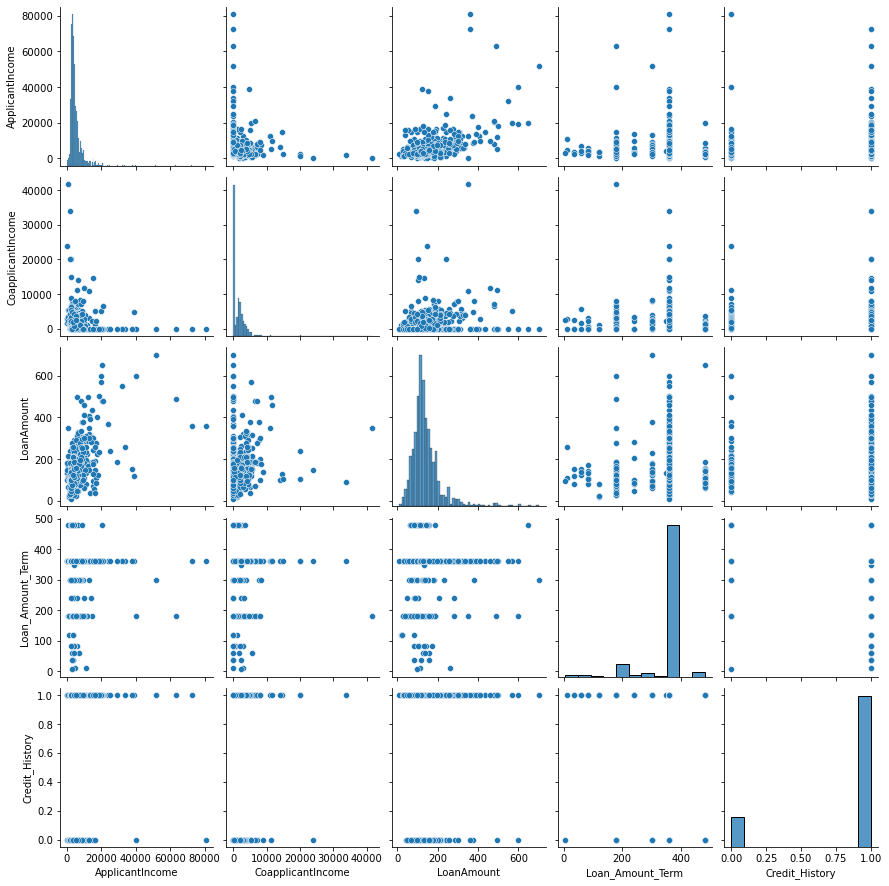

In [843]:
data2 = pd.concat([train,test])
sns.pairplot(data2)

In [ ]:
train_preprocessed
train

In [1037]:

train_set, test_set = train_test_split(train_preprocessed, test_size=0.2, random_state=8)
strat_train_set, strat_test_set = train_test_split(train_preprocessed, test_size=0.2, random_state=8,\
                                                   shuffle=True, stratify=train_preprocessed['Loan_Status_num'])
compare_props = pd.DataFrame({
    "Overall": data['Loan_Status_num'].value_counts() / len(data),
    "Overall-preprc": train_preprocessed['Loan_Status_num'].value_counts() / len(train_preprocessed),
    "Random-preprc": test_set['Loan_Status_num'].value_counts() / len(test_set),
    "Strat-preprc": strat_test_set['Loan_Status_num'].value_counts() / len(strat_test_set)
}).sort_index()


compare_props["Rand. %error"] = 100 * compare_props["Random-preprc"] / compare_props["Overall"] - 100
compare_props["Rand.preprc %error"] = 100 * compare_props["Random-preprc"] / compare_props["Overall-preprc"] - 100
compare_props["Strat.preprc %error"] = 100 * compare_props["Strat-preprc"] / compare_props["Overall-preprc"] - 100

display(compare_props)

print("proportion:", train_preprocessed['Loan_Status_num'].value_counts()[1]/train_preprocessed['Loan_Status_num'].value_counts()[0])

,Overall,Overall-preprc,Random-preprc,Strat-preprc,Rand. %error,Rand.preprc %error,Strat.preprc %error
0.0,0.196319,0.314239,0.382114,0.317073,94.639228,21.599763,0.901931
1.0,0.428425,0.685761,0.617886,0.682927,44.222597,-9.897743,-0.413295


proportion: 2.1822916666666665


In [1046]:
# Class count
print('Before Random over-sampling:')
print(train_preprocessed['Loan_Status_num'].value_counts())
count_class_0, count_class_1 = train_preprocessed['Loan_Status_num'].value_counts().sort_index()
# Divide by class
df_class_0 = train_preprocessed[train_preprocessed['Loan_Status_num'] == 0]
df_class_1 = train_preprocessed[train_preprocessed['Loan_Status_num'] == 1]
#Random oversampling
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
train_preprocessed_ovr = pd.concat([df_class_1, df_class_0_over], axis=0)

print('After Random over-sampling:')
print(train_preprocessed_ovr.Loan_Status_num.value_counts())

Before Random over-sampling:
1.0    419
0.0    192
Name: Loan_Status_num, dtype: int64
After Random over-sampling:
0.0    419
1.0    419
Name: Loan_Status_num, dtype: int64


In [1052]:
train_preprocessed_ovr.shape#,train_preprocessed_ovr.head()

(838, 28)

Train Accuracy score  : 0.7195704057279236
Train Recall score    : 0.8663484486873508
Train Precision score : 0.6697416974169742
Train F1 score        : 0.7554630593132154
Train ROC_AUC score   : 0.7195704057279236
Train Confusion Matrix:
 [[240 179]
 [ 56 363]]
Train Classification Report
               precision    recall  f1-score   support

         0.0       0.81      0.57      0.67       419
         1.0       0.67      0.87      0.76       419

    accuracy                           0.72       838
   macro avg       0.74      0.72      0.71       838
weighted avg       0.74      0.72      0.71       838

Y    256
N    111
Name: Loan_Status, dtype: int64


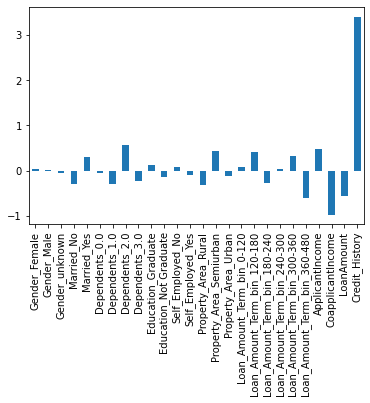

In [1054]:
#after ovrsampling, binning,scaling
X = train_preprocessed_ovr.drop(columns=["Loan_ID","Loan_Status_num"])
y = train_preprocessed_ovr["Loan_Status_num"]
model = LogisticRegression()#(random_state=0, class_weight='balanced')
build_model(model,X,y,"Train")
test_X = test_preprocessed.drop(columns='Loan_ID')
y_test_pred = model.predict(test_X)
submission['Loan_Status'] = y_test_pred
submission['Loan_Status'].replace({1:"Y",0:"N"}, inplace = True)
print(submission['Loan_Status'].value_counts())
#submission.to_csv("Loan_logistic_fe_bin_scl_ovr v6.csv",index = False)
#0.7222

D:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Train Accuracy score  : 0.7243436754176611
Train Recall score    : 0.8806682577565632
Train Precision score : 0.6709090909090909
Train F1 score        : 0.761609907120743
Train ROC_AUC score   : 0.7243436754176611
Train Confusion Matrix:
 [[238 181]
 [ 50 369]]
Train Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.57      0.67       419
         1.0       0.67      0.88      0.76       419

    accuracy                           0.72       838
   macro avg       0.75      0.72      0.72       838
weighted avg       0.75      0.72      0.72       838

Y    259
N    108
Name: Loan_Status, dtype: int64


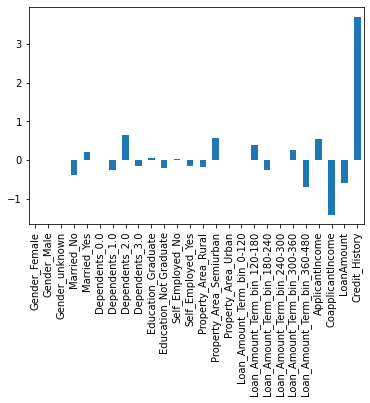

In [1055]:
#after ovrsampling, binning & scaling 
X = train_preprocessed_ovr.drop(columns=["Loan_ID","Loan_Status_num"])
y = train_preprocessed_ovr["Loan_Status_num"]
model = LogisticRegression(penalty='elasticnet', l1_ratio=0.6, C=2, solver='saga')#, random_state=0, class_weight='balanced')
build_model(model,X,y,"Train")
test_X = test_preprocessed.drop(columns='Loan_ID')
y_test_pred = model.predict(test_X)
submission['Loan_Status'] = y_test_pred
submission['Loan_Status'].replace({1:"Y",0:"N"}, inplace = True)
print(submission['Loan_Status'].value_counts())
#submission.to_csv("Loan_logistic_fe_bin_scl_ovr_elastic v6.csv",index = False)
#0.72916

# another approach

233 981 748
Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64


Y    90
N    44
Name: Loan_Status, dtype: int64

In [46]:
data = pd.concat([train,test])
data = data.reset_index().drop(columns='index')
'''
display(data)
print(data.shape, data.index)
print(data.drop(columns=['Loan_Status']).isna().sum().sum(),len(data),981-233)
print(data.drop(columns=['Loan_Status']).isna().sum())
print(data[data.drop(columns=['Loan_Status']).isna().any(axis=1)]['Loan_Status'].value_counts())
data2 = data.drop(columns=['Loan_Status']).dropna()
print(data2.shape, data2.index)
display(data[data['Loan_Status'].notna()]['Loan_Status'])
data3 = pd.concat([data2,data['Loan_Status'].notna()],axis=1).dropna()
print('-'*20)
display(data3)
print('*'*20)
#data = pd.concat([train,test])

data2 = data.drop(columns=['Loan_Status']).dropna()
data3 = pd.concat([data2,data['Loan_Status'].notna()],axis=1).dropna()
#display(data['Loan_Status'].notna().value_counts())
#display(data[(data['Loan_Status']>=0),'Loan_Status'])
display(data.head())
print(data.shape, data.index)
print(data3.shape, data3.index)
display(data.query('(Loan_Status=="Y" or Loan_Status=="N")')['Loan_Status'])
'''
data.Loan_Status.fillna('Z', inplace=True)
#data['Loan_Status'].fillna('W', inplace=True)
#print(data.Loan_Status.value_counts(), data.Loan_Status.isna().sum())
print(data.shape, data.index)   
data2 = data.dropna()
print(data2.shape, data2.index)  
print(data[(data.Loan_Status!="Z")]['Loan_Status'].value_counts())
data3 = pd.concat([data2,data[(data.Loan_Status!='Z')]['Loan_Status']], axis=1)
print(data3.shape, data3.index)           
display(data3.head())
xxx
data["Loan_Status_num"] = data["Loan_Status"].replace({"Y":1, "N":0})
data["Gender_num"] = data["Gender"].replace({"Male":1, "Female":0})
data["Married_num"] = data["Married"].replace({"Yes":1, "No":0})
data["Education_num"] = data["Education"].replace({"Graduate":1, "Not Graduate":0})
data["Self_Employed_num"] = data["Self_Employed"].replace({"Yes":1, "No":0})
data["Property_Area_num"] = data["Property_Area"].replace({"Urban":2, "Semiurban":1, "Rural":0})
'''
data["ApplicantIncome_log"] = np.log1p(data["ApplicantIncome"])
data["CoapplicantIncome_log"] = np.log1p(data["CoapplicantIncome"])
data["LoanAmount_log"] = np.log1p(data["LoanAmount"])

data['total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['total_income_by_loanAmt'] = data['total_income'] / data['LoanAmount']
data['ApplicantIncome_by_loanAmt'] = data['ApplicantIncome'] / data['LoanAmount']
data['Loan_Amount_Term_By_amt'] = data['LoanAmount'] / data['Loan_Amount_Term']

data["total_income_by_loanAmt_log"] = np.log1p(data["total_income_by_loanAmt"])
data["Loan_Amount_Term_By_amt_log"] = np.log1p(data["Loan_Amount_Term_By_amt"])
'''
#data["Gender"].fillna("unknown",inplace=True)

#data.dropna(subset=["Married"],inplace=True)
#data.reset_index().drop(columns="index")

data["Dependents"].replace({'3+':3}, inplace = True)
#data['Dependents'] = data['Dependents'].astype('float')
#data["Dependents"].fillna(0, inplace = True)
data["Dependents"] = data["Dependents"].astype('str')

#data.loc[data["Self_Employed"].isna(),"Self_Employed"] = data[data["Self_Employed"].isna()]["ApplicantIncome"].apply(lambda x: "Yes" if x>5000 else "No")

#data["LoanAmount"] = data.groupby("Property_Area").LoanAmount.transform(lambda x: x.fillna(x.median()))

#data['Loan_Amount_Term'].fillna(value=data['Loan_Amount_Term'].mode()[0],inplace=True)

bins = [0,120,180,240,300,360,480]
labels = ['0-120','120-180','180-240','240-300','300-360','360-480']
data["Loan_Amount_Term_bin"] = pd.cut(data["Loan_Amount_Term"], bins=bins, labels=labels)

#data["Credit_History"].fillna(1, inplace = True)

data["Loan_Status_num"] = data["Loan_Status"].replace({"Y":1, "N":0})
data["Gender_num"] = data["Gender"].replace({"Male":1, "Female":0})
data["Self_Employed_num"] = data["Self_Employed"].replace({"Yes":1, "No":0})

'''
data["LoanAmount_log"] = np.log1p(data["LoanAmount"])
data["ApplicantIncome_log"] = np.log1p(data["ApplicantIncome"])
data["CoapplicantIncome_log"] = np.log1p(data["CoapplicantIncome"])

data['total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['total_income_by_loanAmt'] = data['total_income'] / data['LoanAmount']
data['ApplicantIncome_by_loanAmt'] = data['ApplicantIncome'] / data['LoanAmount']
data['Loan_Amount_Term_By_amt'] = data['LoanAmount'] / data['Loan_Amount_Term']
data["total_income_by_loanAmt_log"] = np.log1p(data["total_income_by_loanAmt"])
data["Loan_Amount_Term_By_amt_log"] = np.log1p(data["Loan_Amount_Term_By_amt"])
'''
[print(data[i].isna().sum(),"(",round((data[i].isnull().sum()/len(data[i]))*100,2),"%)-->",i) for i in data.columns if data[i].isna().sum()>0]


(981, 13) RangeIndex(start=0, stop=981, step=1)
(769, 13) Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            968, 969, 970, 971, 973, 975, 976, 977, 979, 980],
           dtype='int64', length=769)
Y    422
N    192
Name: Loan_Status, dtype: int64
(903, 14) Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            968, 969, 970, 971, 973, 975, 976, 977, 979, 980],
           dtype='int64', length=903)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,Y


NameError: name 'xxx' is not defined